### IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split #train test division to see the model accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

### Load the Dataset

In [ ]:
DATA = pd.read_excel('Customer-Churn.xlsx')

In [ ]:
DATA.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
DATA.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Columns in the dataset
Given the columns in the dataset, here are descriptions of what each column likely represents:

1. customerID: A unique identifier for each customer.

2. gender: The gender of the customer (e.g., Male, Female).

3. SeniorCitizen: Indicates whether the customer is a senior citizen (typically represented as 1 for Yes, 0 for No).

4. Partner: Indicates whether the customer has a partner (Yes or No).

5. Dependents: Indicates whether the customer has dependents (Yes or No).

6. tenure: The number of months the customer has been with the company.

7. PhoneService: Indicates whether the customer has a phone service (Yes or No).

8. MultipleLines: Indicates whether the customer has multiple lines (e.g., Yes, No, or No phone service).

9. InternetService: Type of internet service the customer has (e.g., DSL, Fiber optic, None).

10. OnlineSecurity: Indicates whether the customer has online security add-on (Yes, No, or No internet service).

11. OnlineBackup: Indicates whether the customer has online backup add-on (Yes, No, or No internet service).

12. DeviceProtection: Indicates whether the customer has device protection add-on (Yes, No, or No internet service).

13. TechSupport: Indicates whether the customer has tech support add-on (Yes, No, or No internet service).

14. StreamingTV: Indicates whether the customer has streaming TV service (Yes, No, or No internet service).

15. StreamingMovies: Indicates whether the customer has streaming movies service (Yes, No, or No internet service).

16. Contract: The type of contract the customer has (e.g., Month-to-month, One year, Two year).

17. PaperlessBilling: Indicates whether the customer uses paperless billing (Yes or No).

18. PaymentMethod: The customer's payment method (e.g., Electronic check, Mailed check, Bank transfer, Credit card).

19. MonthlyCharges: The amount charged to the customer monthly.

20. TotalCharges: The total amount charged to the customer over their tenure.

21. Churn: Indicates whether the customer has left the company (Yes or No).

These columns provide a comprehensive view of customer demographics, services subscribed, and their billing information, which can be useful for analyzing customer behavior and predicting churn.


In [ ]:
# Check the datat types
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### DATA PREPROCESSING

#### Data Type mismatch for 'SeniorCitizen' column found

In [ ]:
# 1. Convert 'SeniorCitizen' to a categorical column
DATA['SeniorCitizen'] = DATA['SeniorCitizen'].astype('category')


In [ ]:
DATA.shape

(7043, 21)

In [ ]:
#Statistical data of all numeric columns
DATA.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
#Checking for null values
DATA.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#check the rows with the null values in Totalcharges
DATA[np.isnan(DATA['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# remove the missing values

DATA.dropna(inplace=True)

In [ ]:
#drop the column not needed
DATA.drop('customerID', axis=1, inplace=True)

In [ ]:
#check the no rows and columns
DATA.shape

(7032, 20)

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

##### For numerical features: Plot histograms to visualize the distribution of each numerical feature.

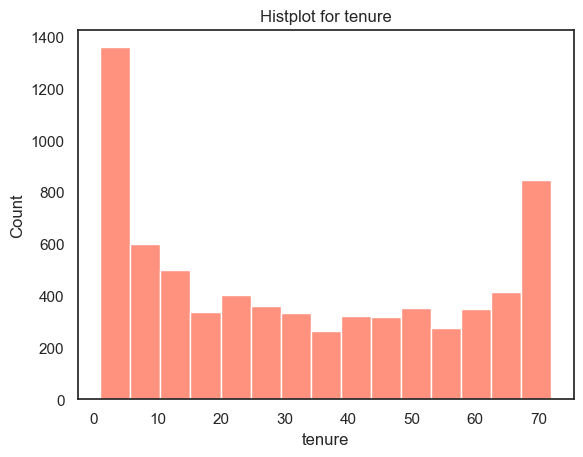

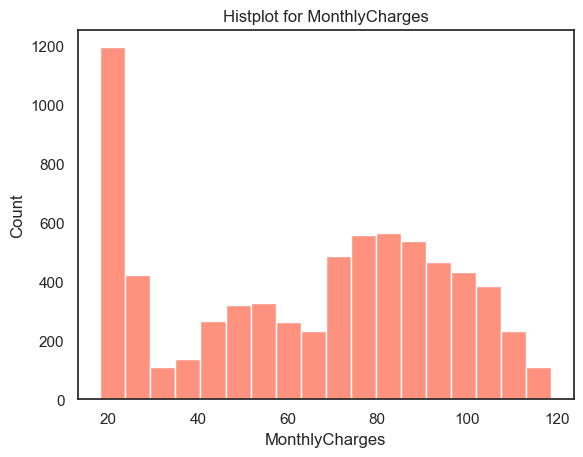

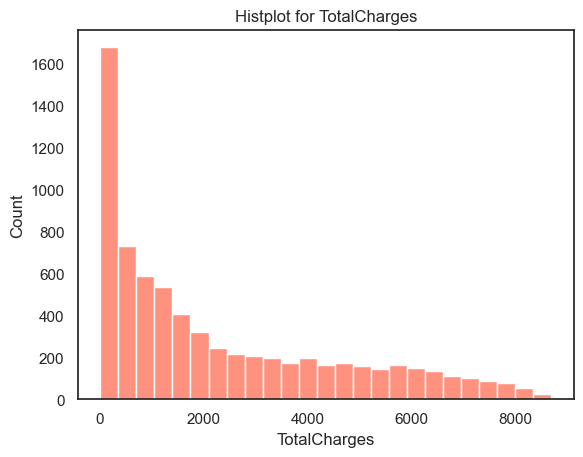

In [ ]:
columns = ['tenure','MonthlyCharges','TotalCharges']
for column in columns:
    # Create histplot for the current column
    sns.histplot(x=DATA[column], palette='Set2')

    # Add title
    plt.title(f'Histplot for {column}')

    # Show plot
    plt.show()

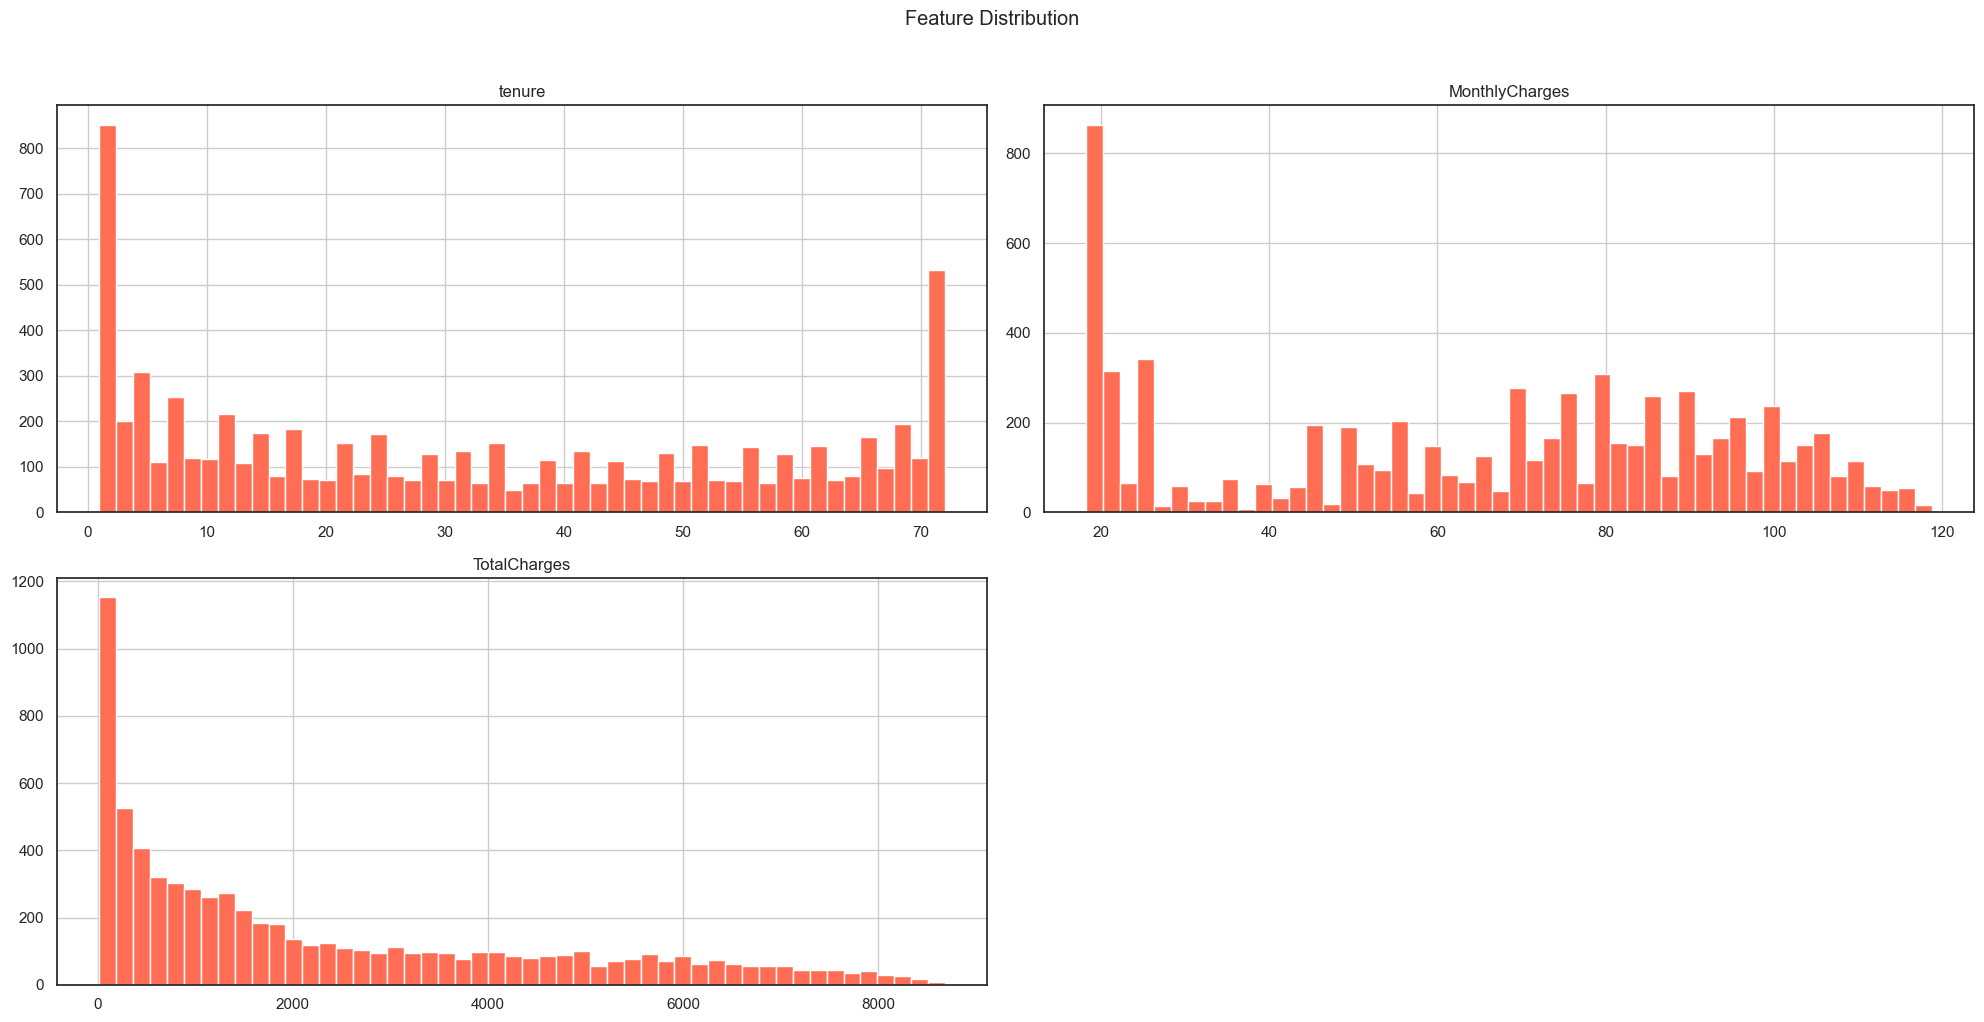

In [ ]:
#alternative way
DATA.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

#### For categorical features: Plot bar charts to visualize the frequency distribution of each categorical feature.

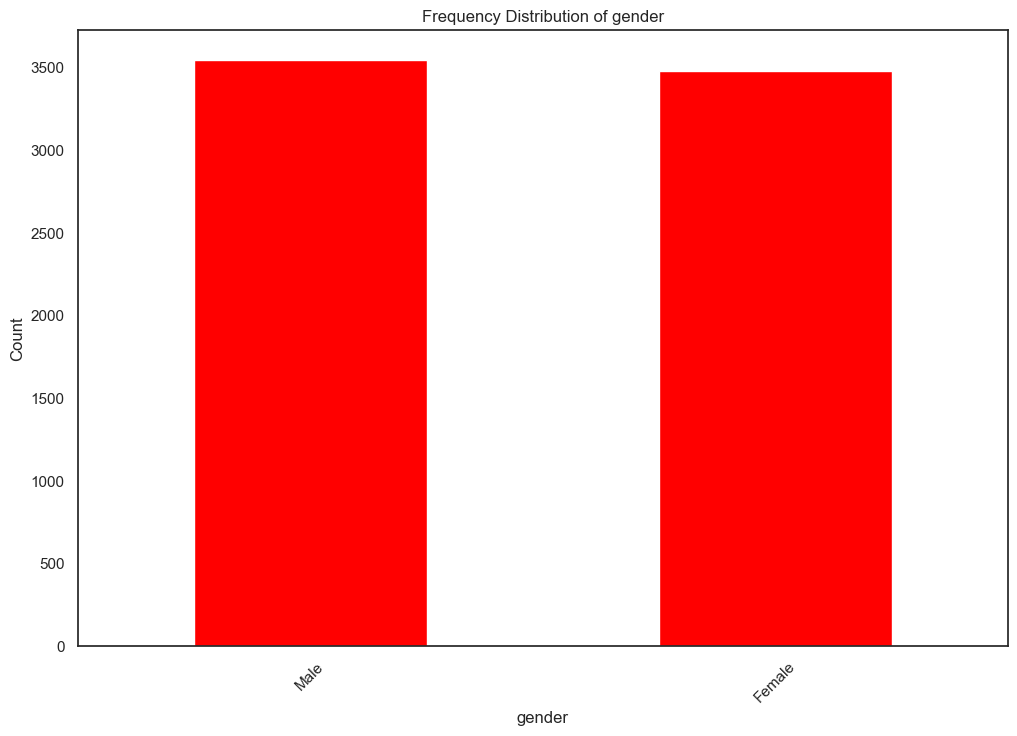

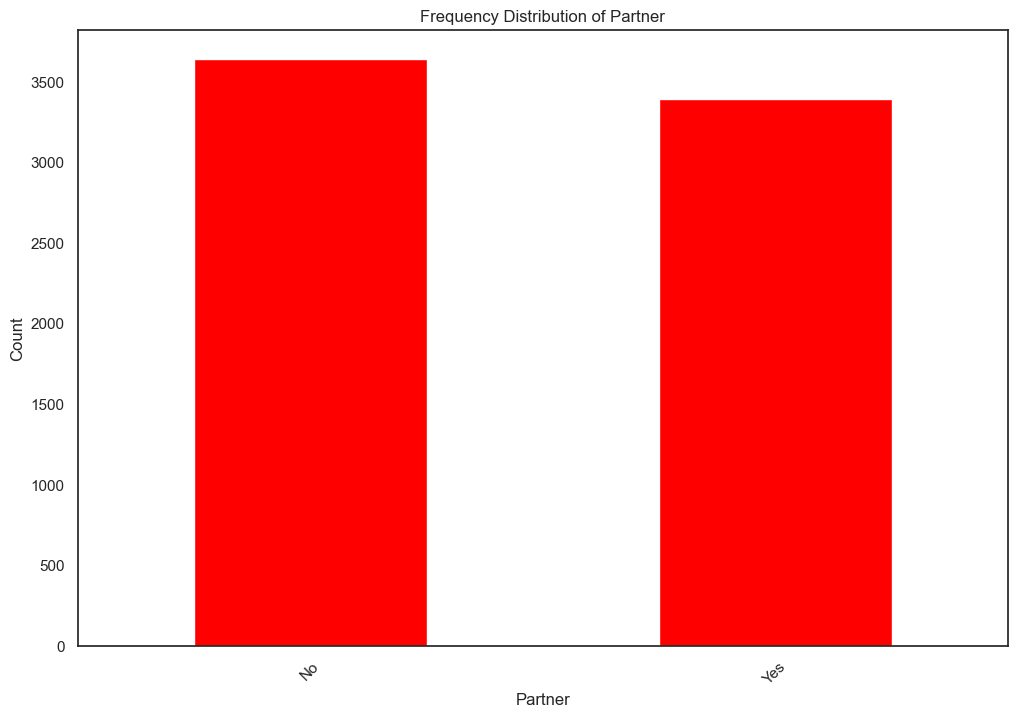

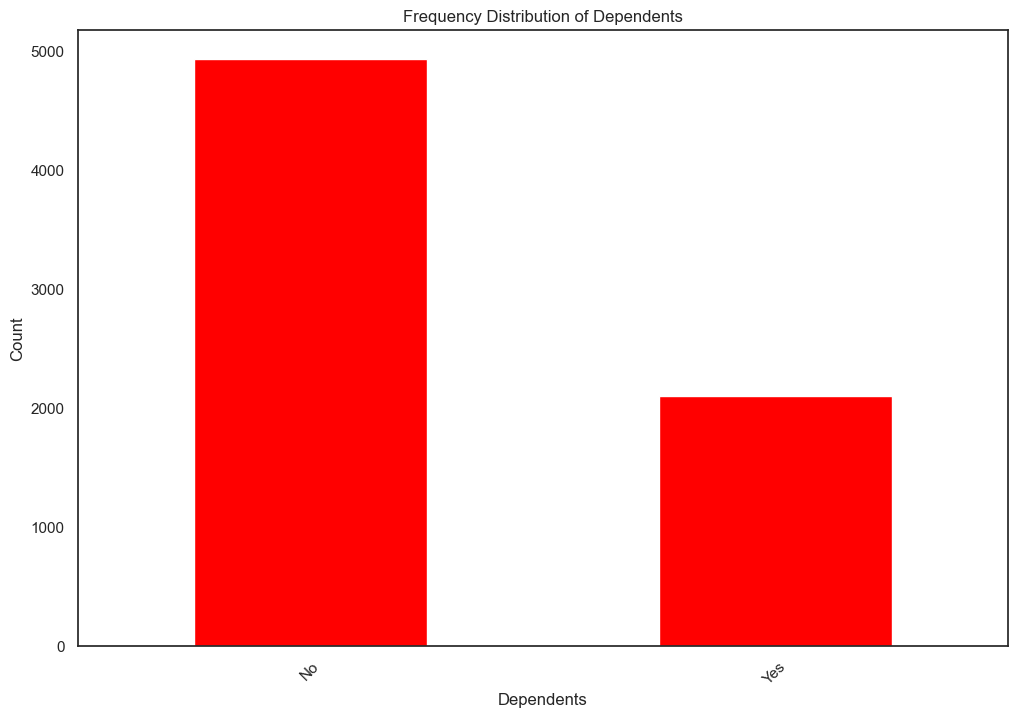

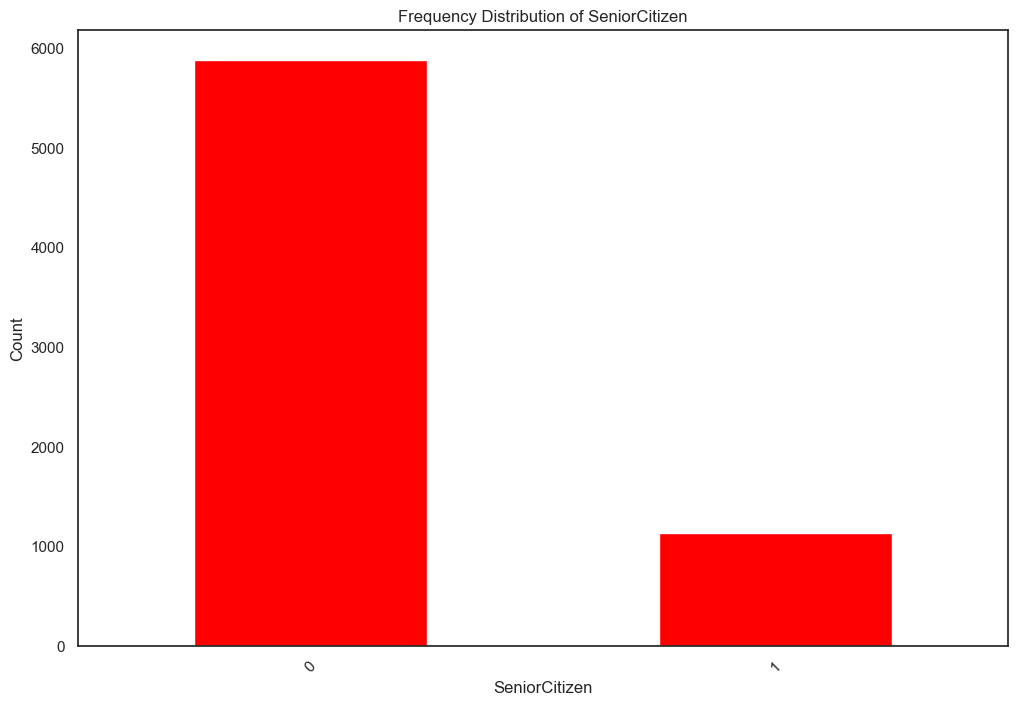

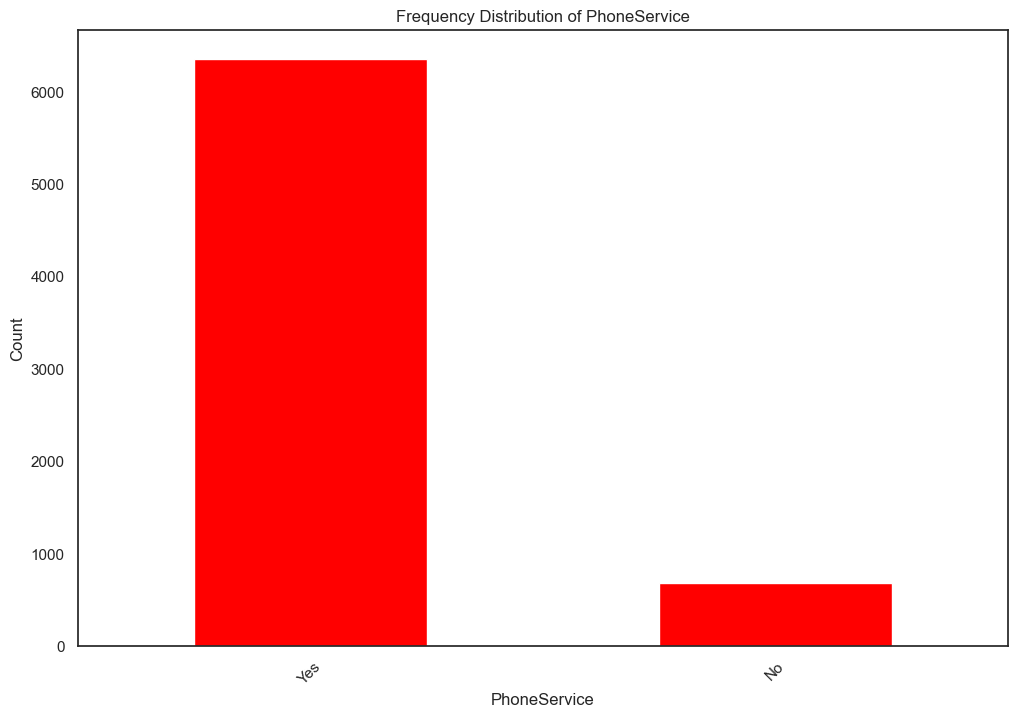

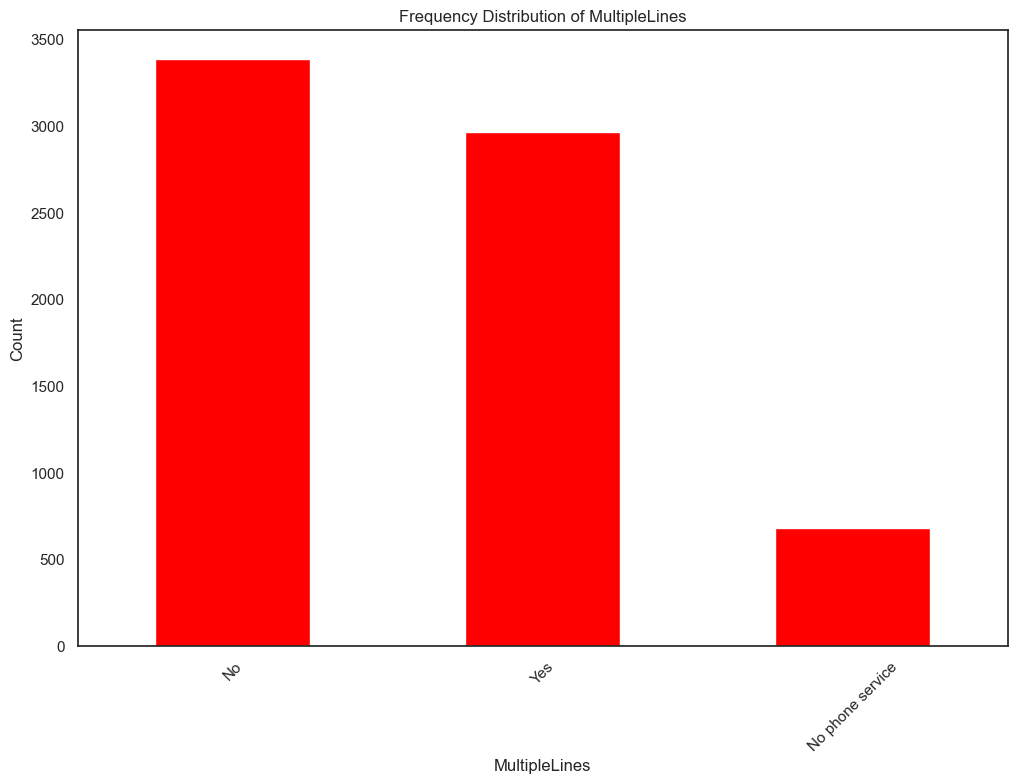

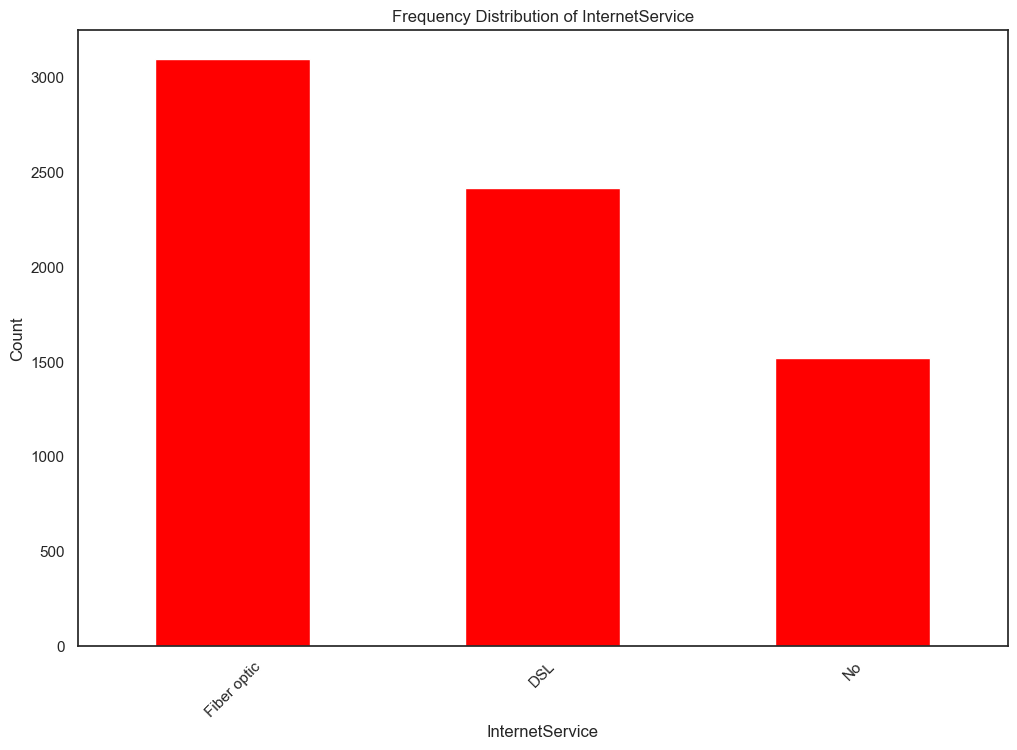

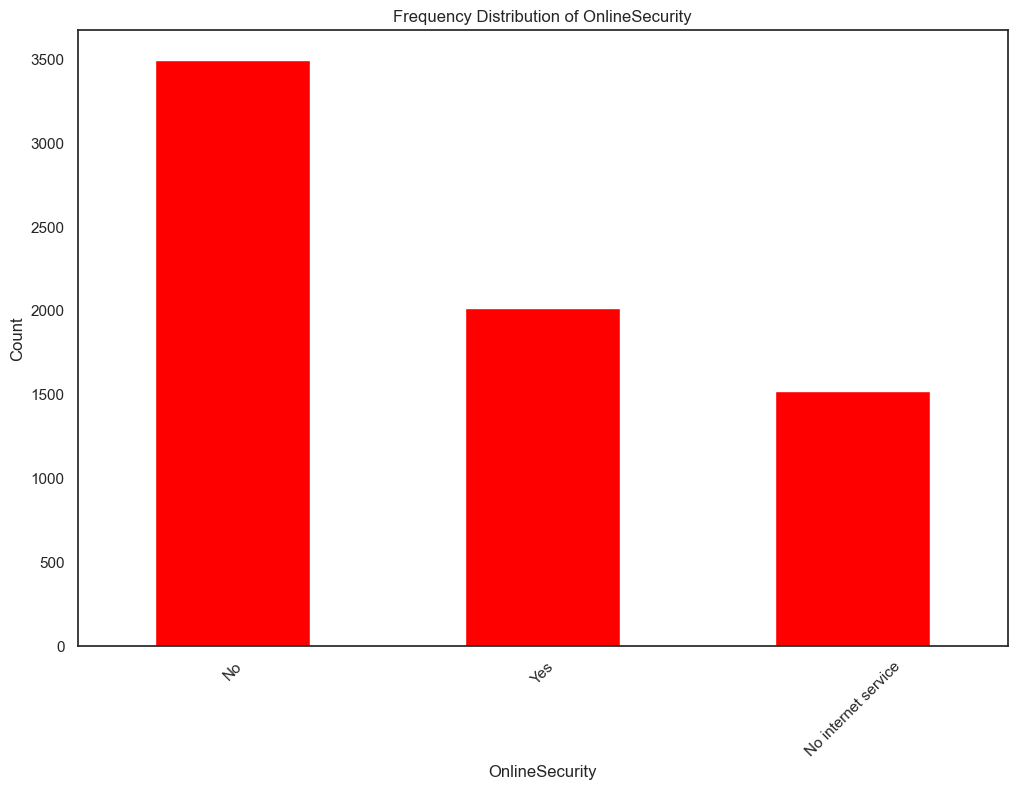

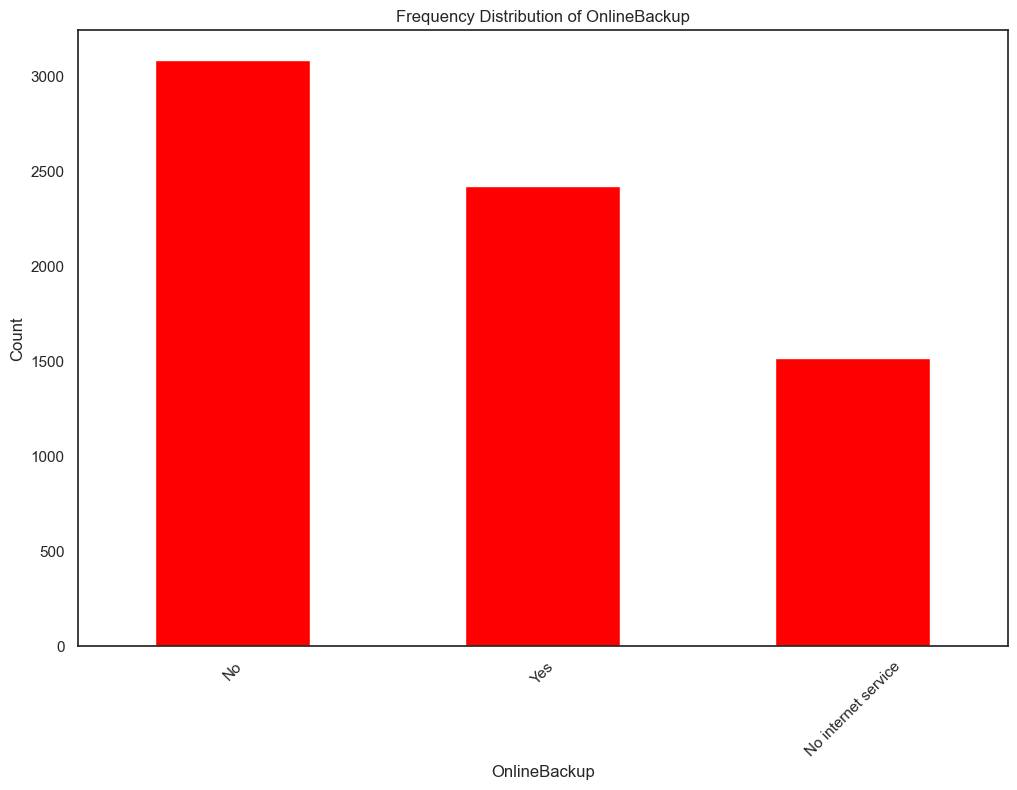

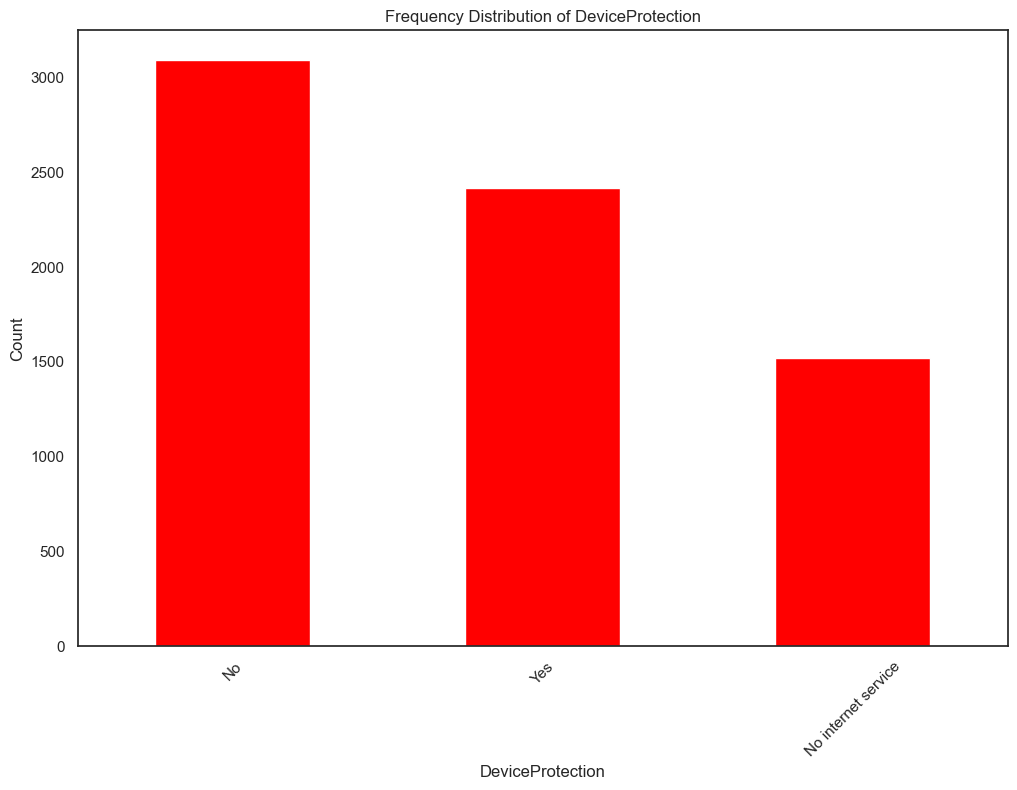

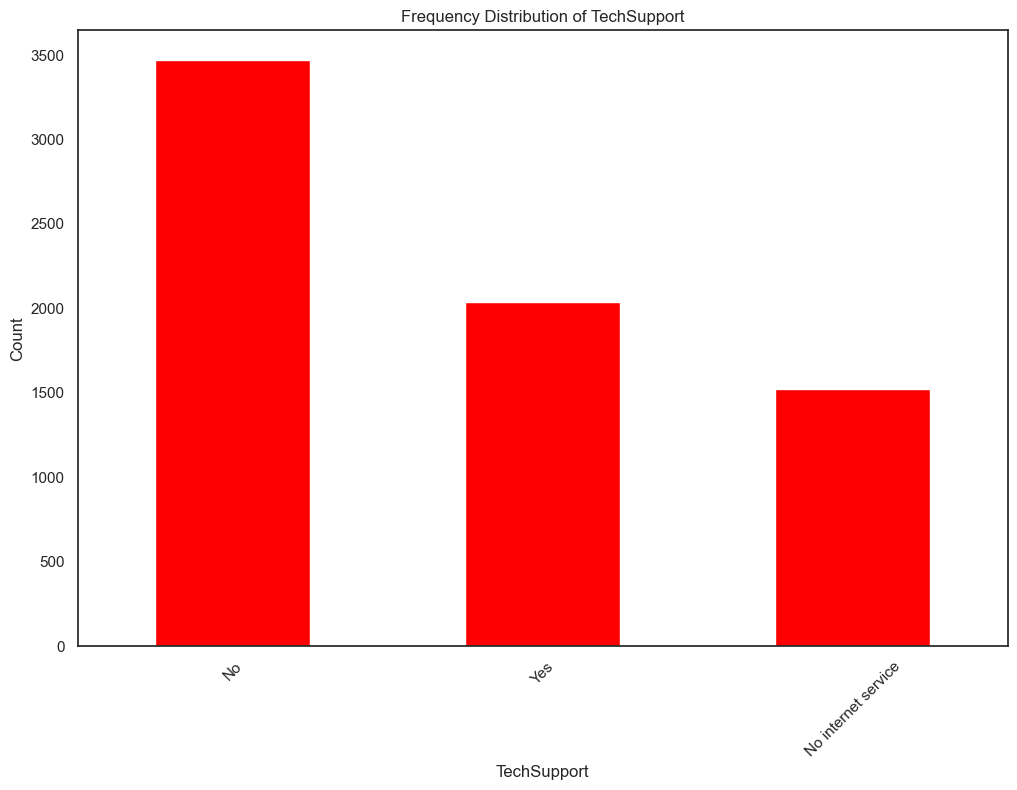

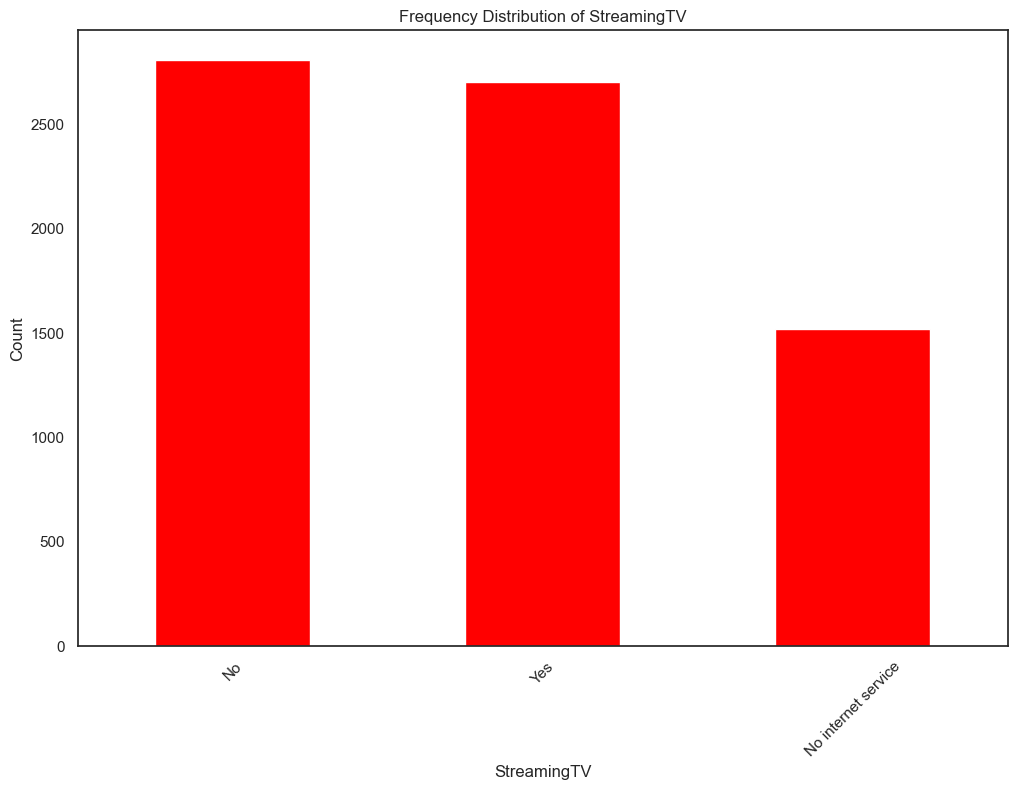

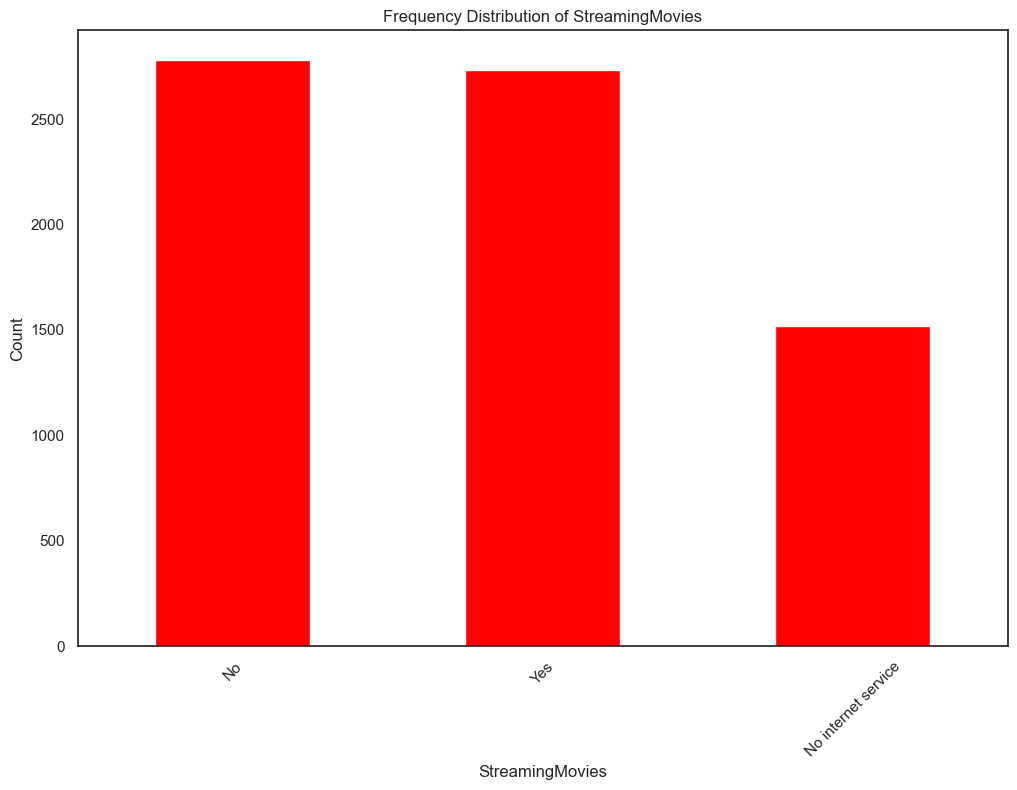

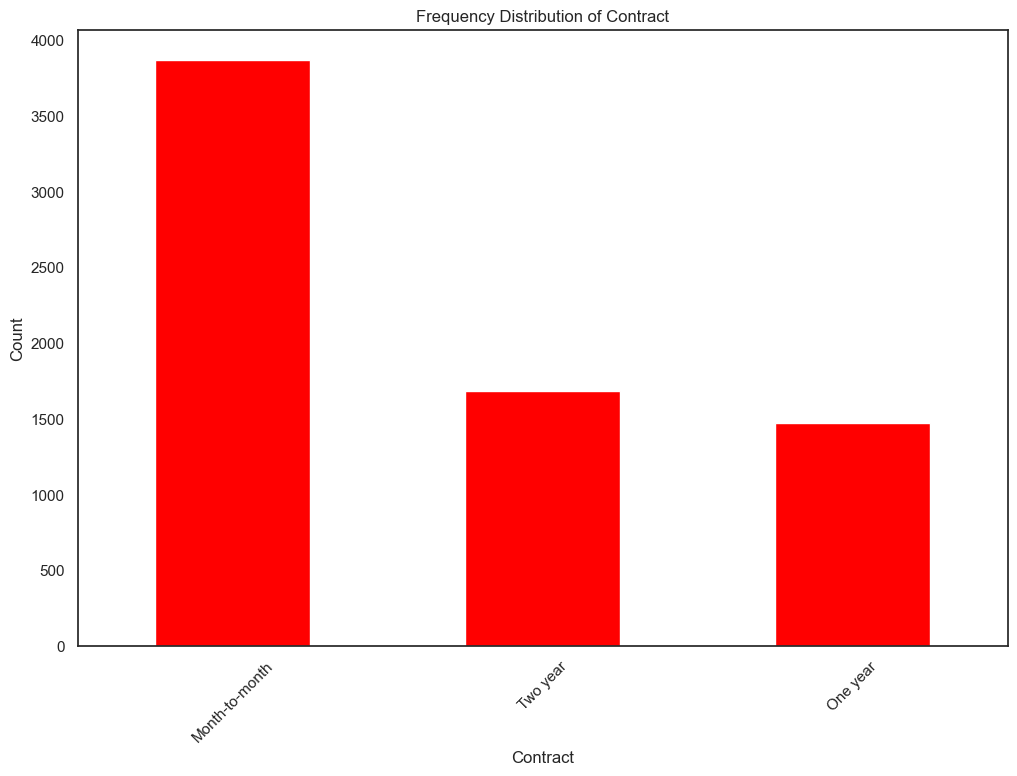

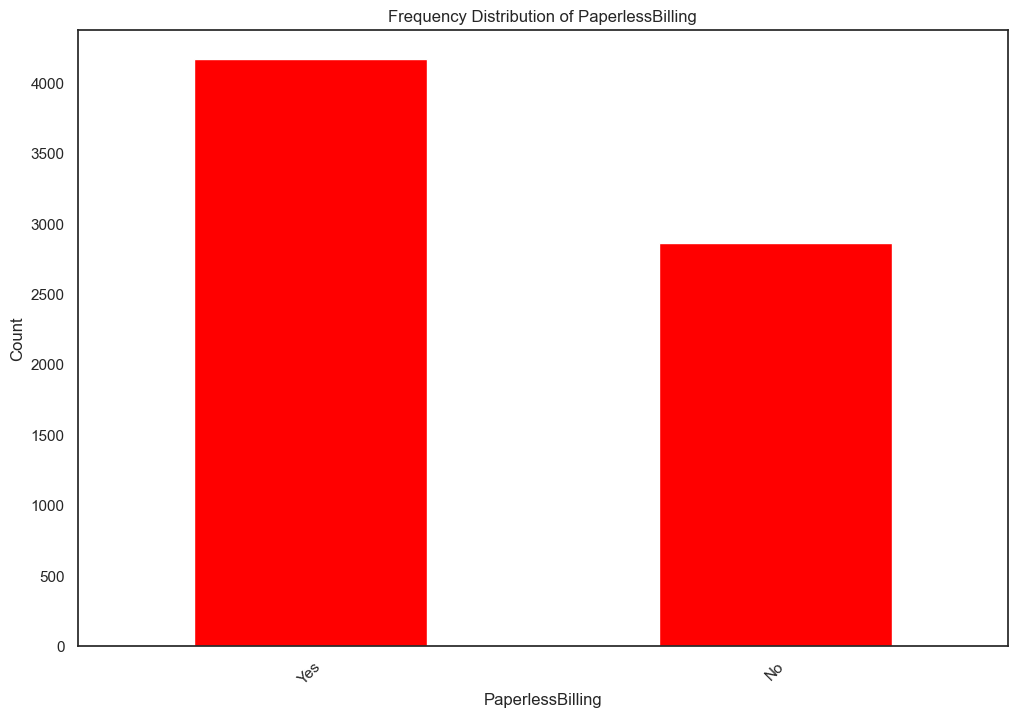

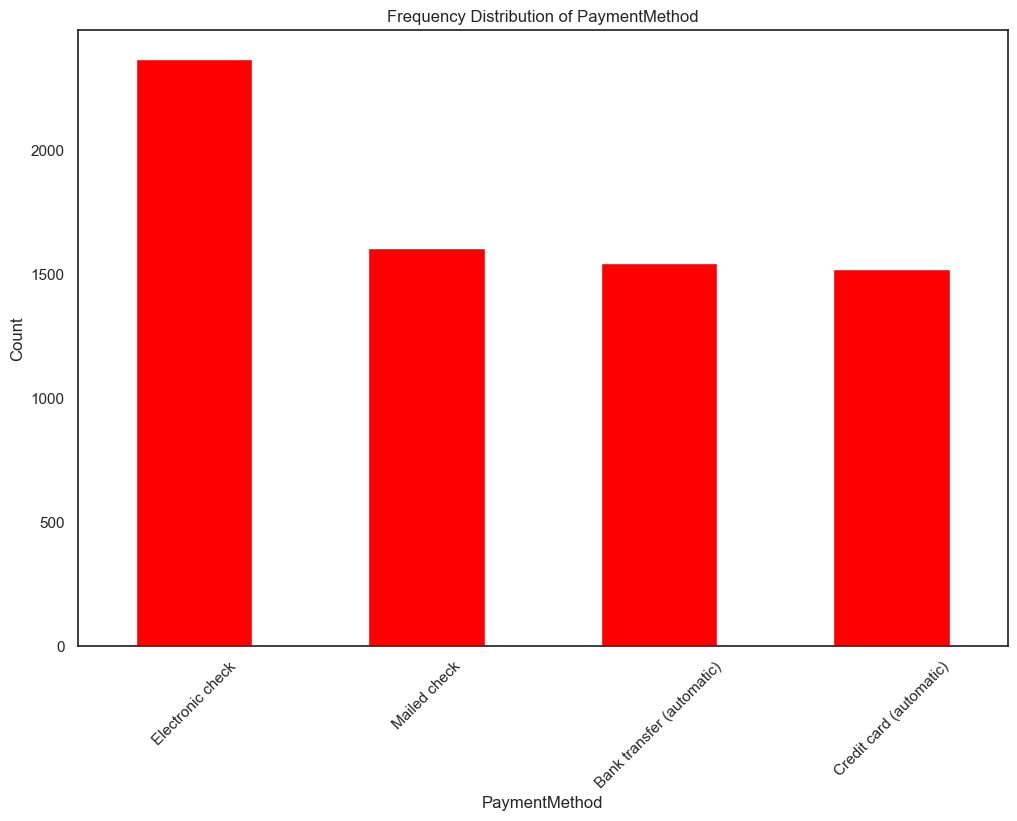

In [ ]:
## List of categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'SeniorCitizen',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']
# Plotting bar charts for each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    column_data = DATA[column]
    column_data.value_counts().plot(kind='bar', color='red')
    plt.title(f"Frequency Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
     # Save the plot as a JPEG file with the column name in the filename
    #plt.savefig(f'{column}_frequency_distribution.jpg', format='jpg', dpi=300)

    plt.show()


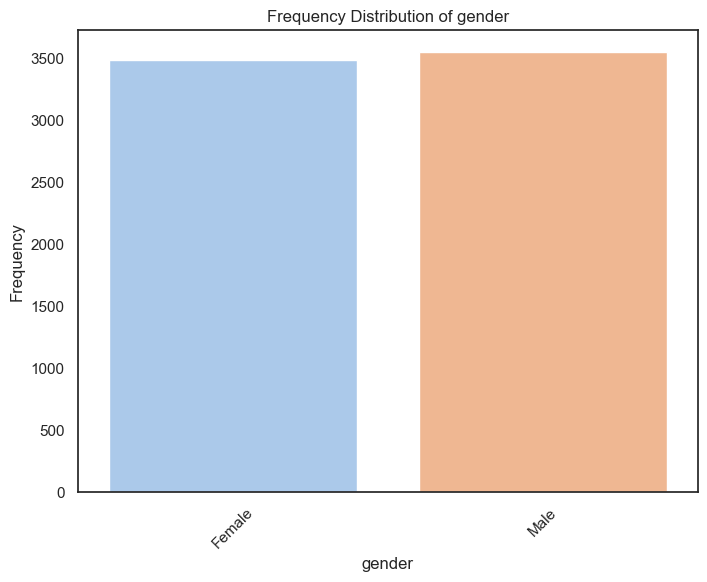

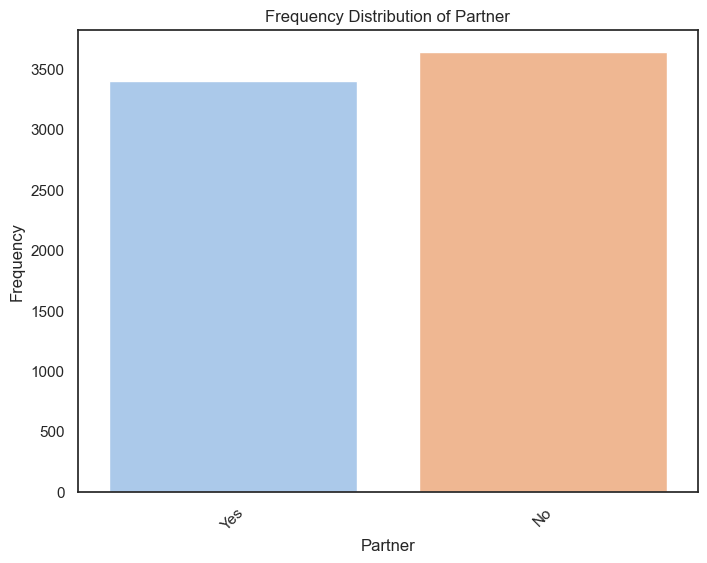

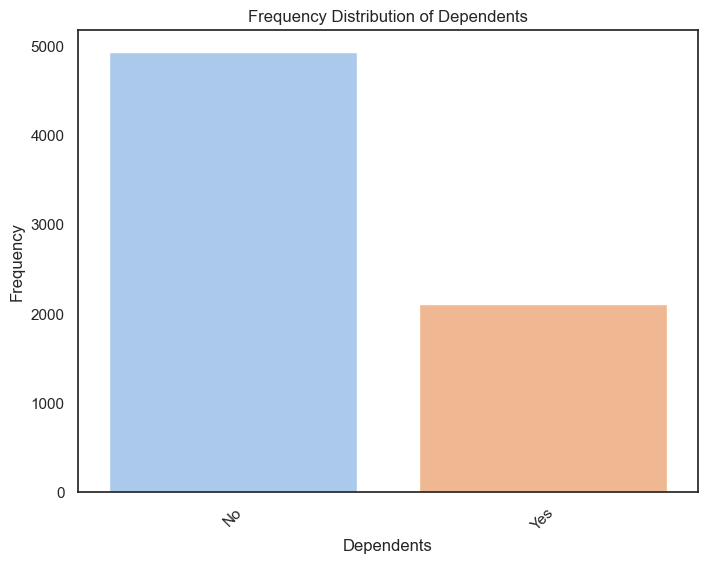

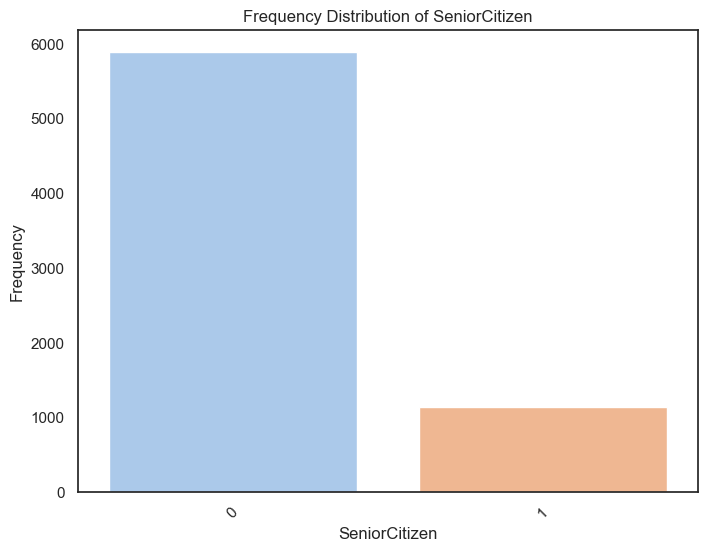

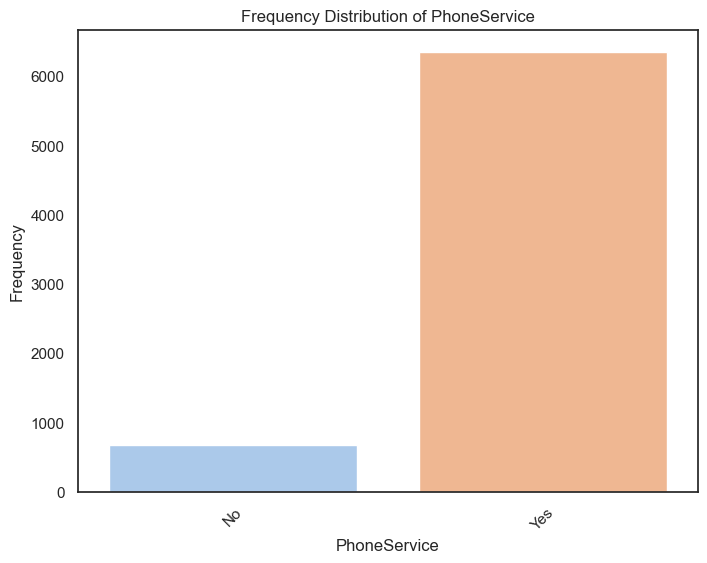

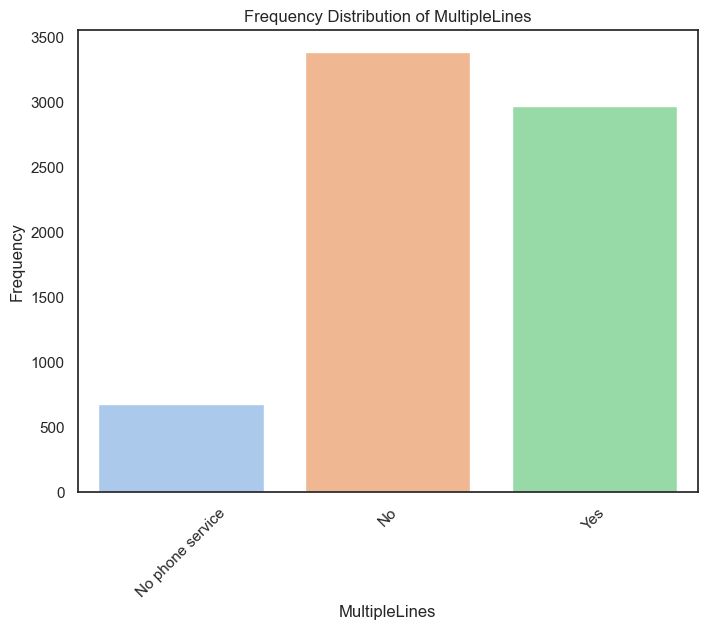

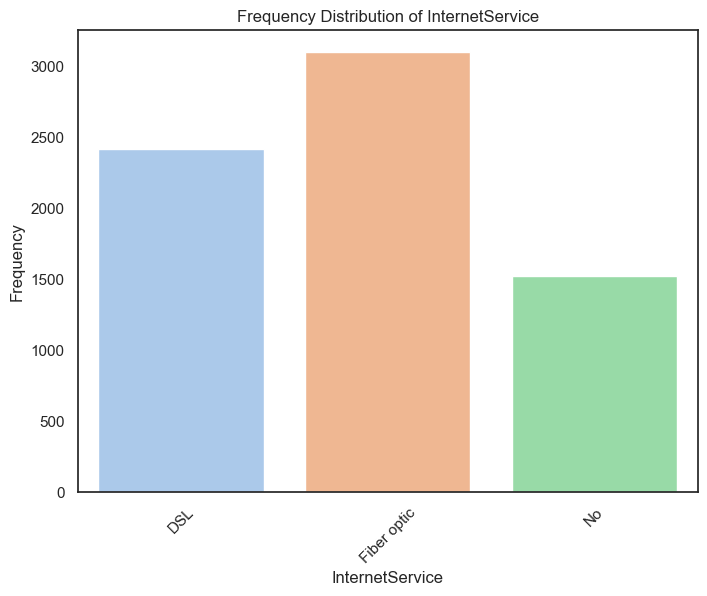

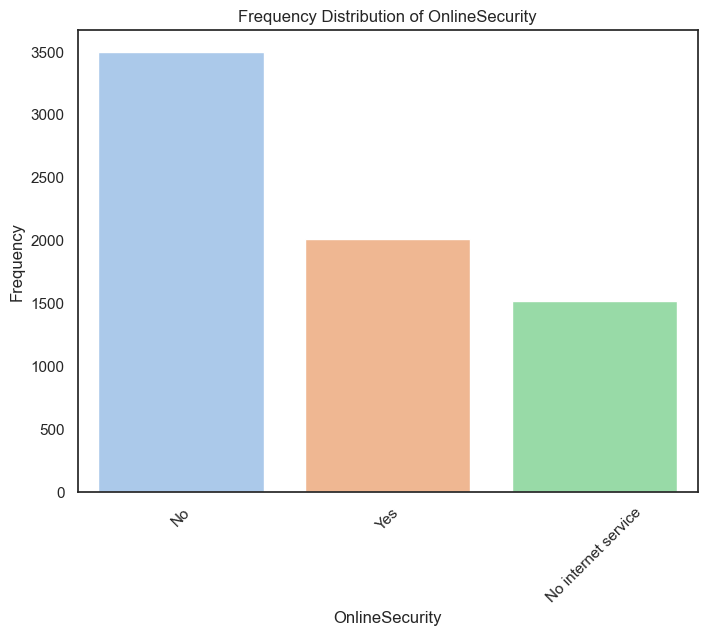

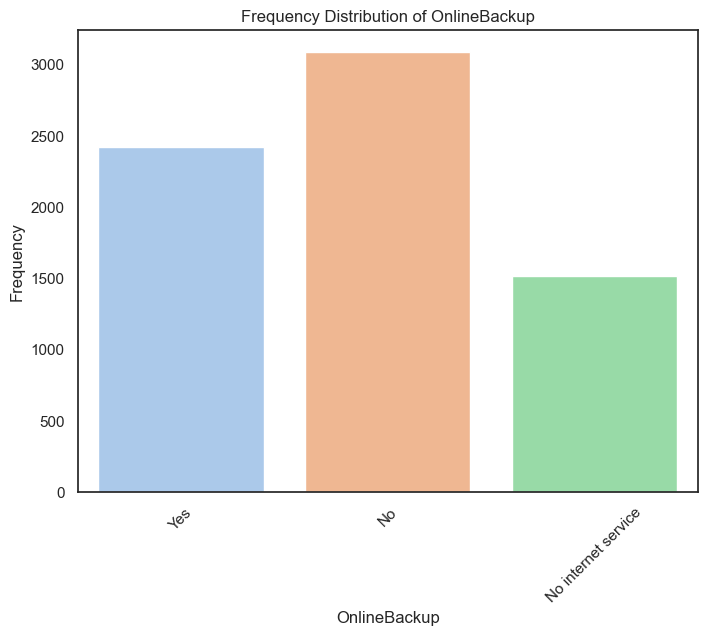

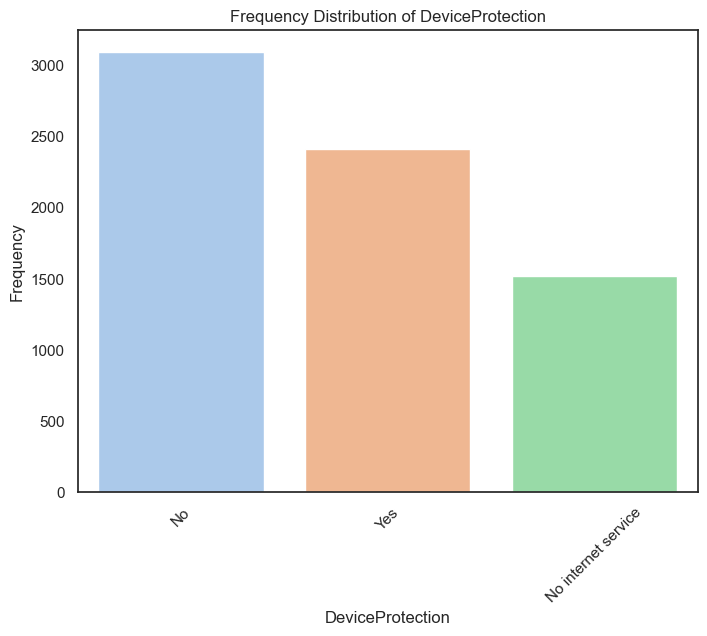

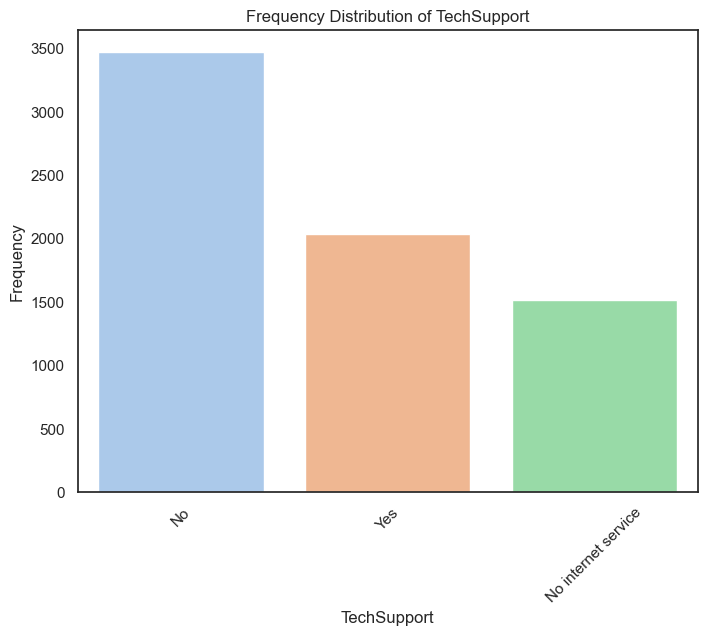

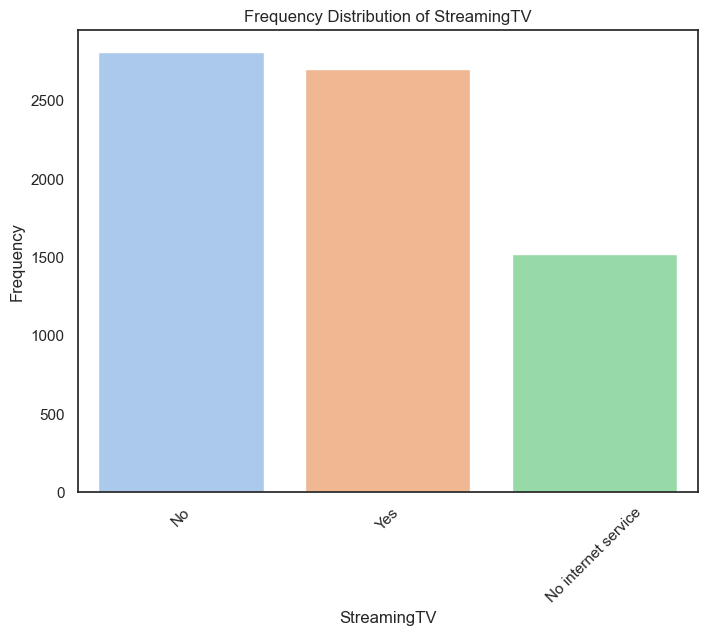

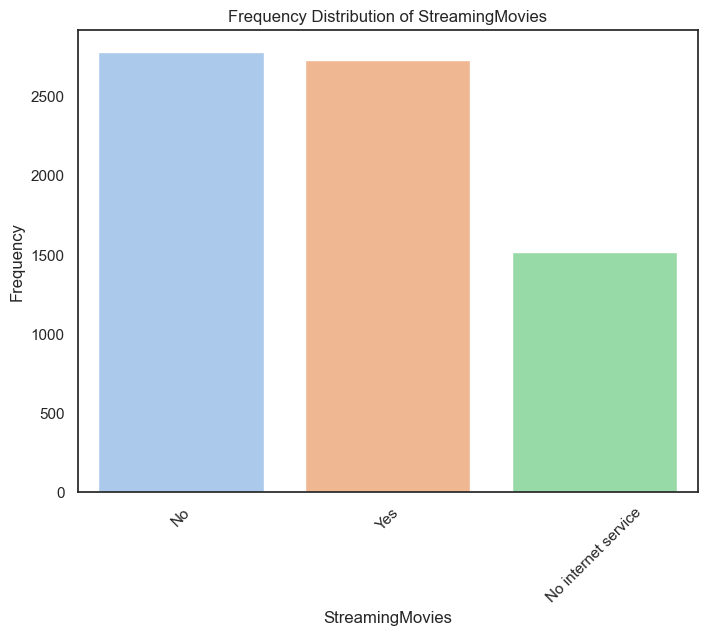

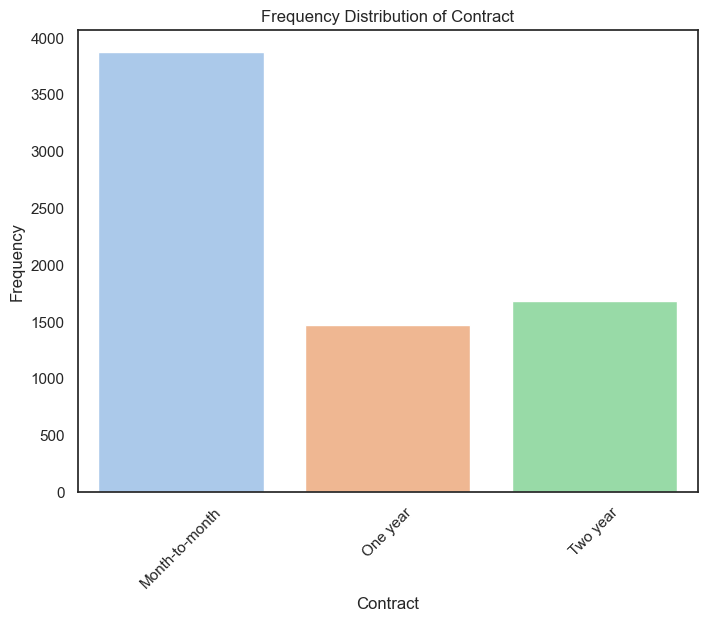

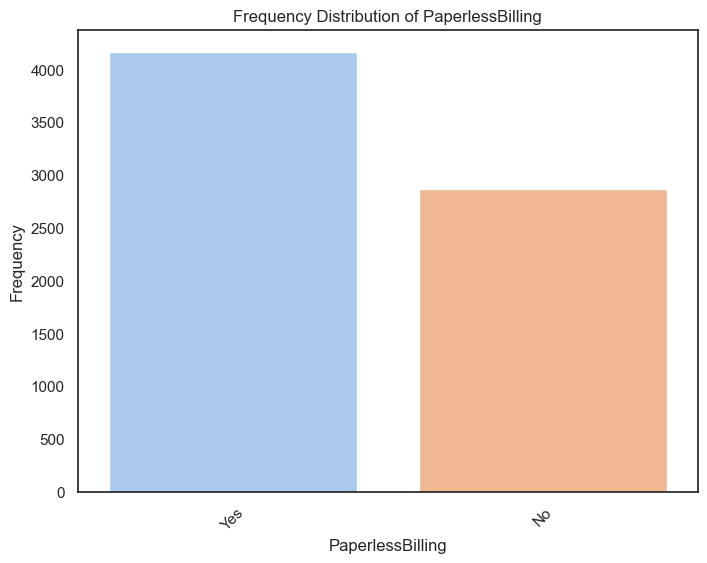

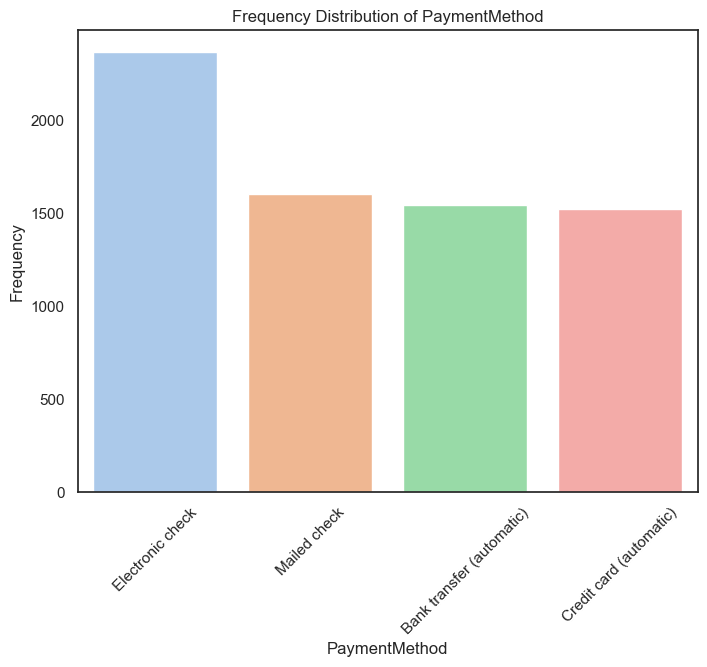

In [ ]:
# List of categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'SeniorCitizen',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']


# Plotting bar charts for each categorical feature
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.countplot(data=DATA, x=column, palette='pastel')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()
    # Save the plot as a JPEG file with the feature name in the filename
   # plt.savefig(f'{feature}_boxplot.jpg', format='jpg', dpi=300)

#### THE BAR PLOT AND COUNT PLOT GIVES SAME RESULT

### BIVARIATE ANALYSIS

### Analyze the relationship between each feature and the target variable (churn).

In [ ]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm


# Chi-square test for categorical variables
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in categorical_features:
    contingency_table = pd.crosstab(DATA[feature], DATA['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Feature: {feature}, p-value: {p}')


Feature: gender, p-value: 0.4904884707065509
Feature: SeniorCitizen, p-value: 2.4792557203954705e-36
Feature: Partner, p-value: 3.97379757451591e-36
Feature: Dependents, p-value: 2.0196592017051303e-42
Feature: PhoneService, p-value: 0.34992398942431924
Feature: MultipleLines, p-value: 0.0035679273999811405
Feature: InternetService, p-value: 5.831198962237274e-159
Feature: OnlineSecurity, p-value: 1.4006867477839222e-184
Feature: OnlineBackup, p-value: 7.776099238804965e-131
Feature: DeviceProtection, p-value: 1.9593887862403176e-121
Feature: TechSupport, p-value: 7.407807748843711e-180
Feature: StreamingTV, p-value: 1.324641113169159e-81
Feature: StreamingMovies, p-value: 5.353560421401324e-82
Feature: Contract, p-value: 7.326182186265472e-257
Feature: PaperlessBilling, p-value: 8.236203353962564e-58
Feature: PaymentMethod, p-value: 1.4263098511063342e-139


In [ ]:
# Logistic regression for continuous variables
continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = DATA[continuous_features]
X = sm.add_constant(X)
y = DATA['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.453372
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7028
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.2170
Time:                        14:05:04   Log-Likelihood:                -3188.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5988      0.117    -13.628      0.000      -1.829      -1.369
tenure           

# For numerical features: Use box plots or violin plots to visualize the relationship.

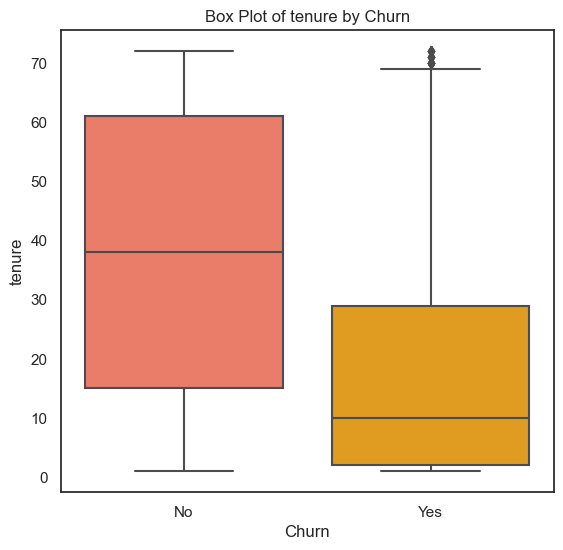

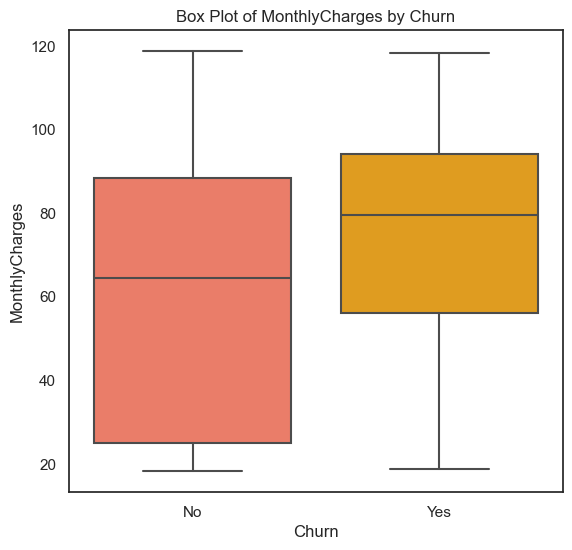

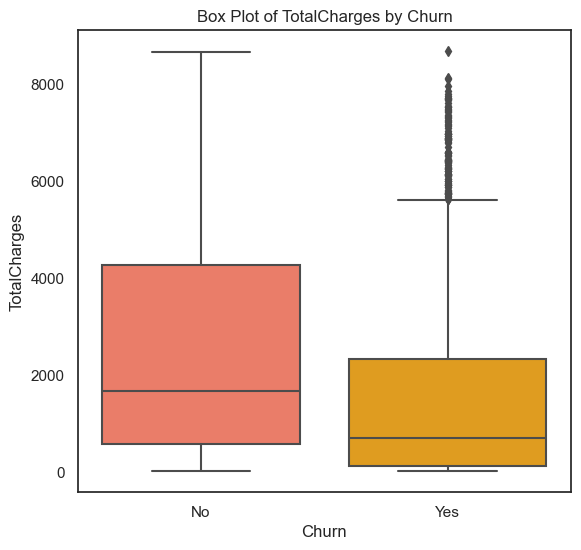

In [ ]:


for feature in continuous_features:
    plt.figure(figsize=(14, 6))


    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Churn', y=feature, data=DATA)
    plt.title(f'Box Plot of {feature} by Churn')

    # Save the plot as a JPEG file with specified DPI
    plt.savefig(f'{feature}_boxplot.jpg', format='jpg', dpi=300)

    # Display the plot
    plt.show()



### Numerical Features Analysis:
Tenure:There is a negative correlation between tenure and churn (-0.35), indicating that as tenure increases, the likelihood of churn decreases.
The distribution plot and scatter plot show that customers with longer tenure are less likely to churn.

MonthlyCharges:There is a positive correlation between monthly charges and churn (0.19), suggesting that customers with higher monthly charges are more likely to churn.
The distribution plot and scatter plot show that customers with higher monthly charges tend to have higher churn rates.

TotalCharges:There is a weak correlation between total charges and churn (0.20), indicating that total charges have a slight influence on churn.
The distribution plot and scatter plot show a slight trend where customers with higher total charges may have higher churn rates.

# For categorical features: Use count plots or stacked bar charts to show the distribution of the target variable across different categories.


### ENCODE THE TARGET VARIABLE CHURN

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Churn' column
DATA['Churn'] = label_encoder.fit_transform(DATA['Churn'])

# Now you can perform arithmetic operations on the 'Churn' column


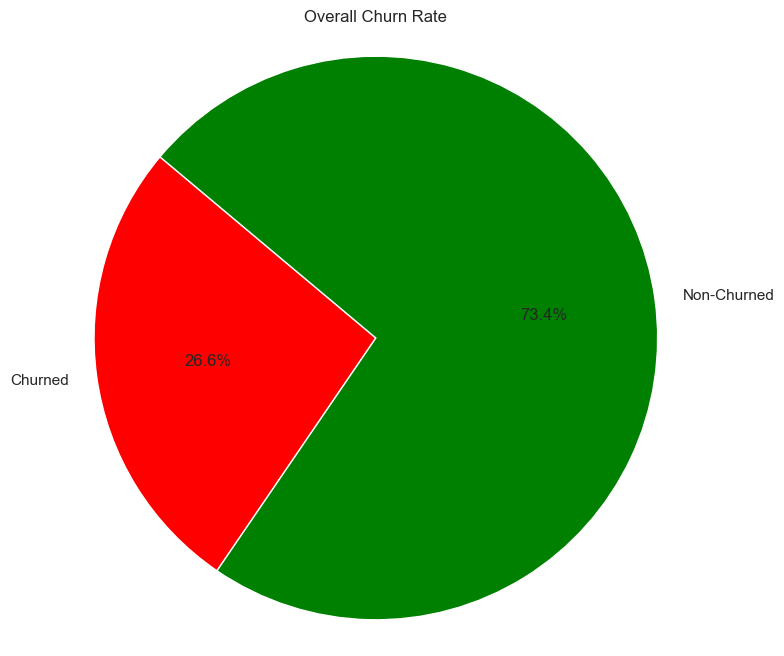

In [ ]:
# Calculate churn rate
total_customers = len(DATA)
churned_customers = DATA['Churn'].sum()
non_churned_customers = total_customers - churned_customers
churn_rate = churned_customers / total_customers * 100

# Create labels and sizes for the pie chart
labels = ['Churned', 'Non-Churned']
sizes = [churned_customers, non_churned_customers]
colors = ['red', 'green']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Churn Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# Save the pie chart as a JPEG file
#plt.savefig('overall_churn_rate.jpg', format='jpg', dpi=300)

# Show the pie chart
plt.show()

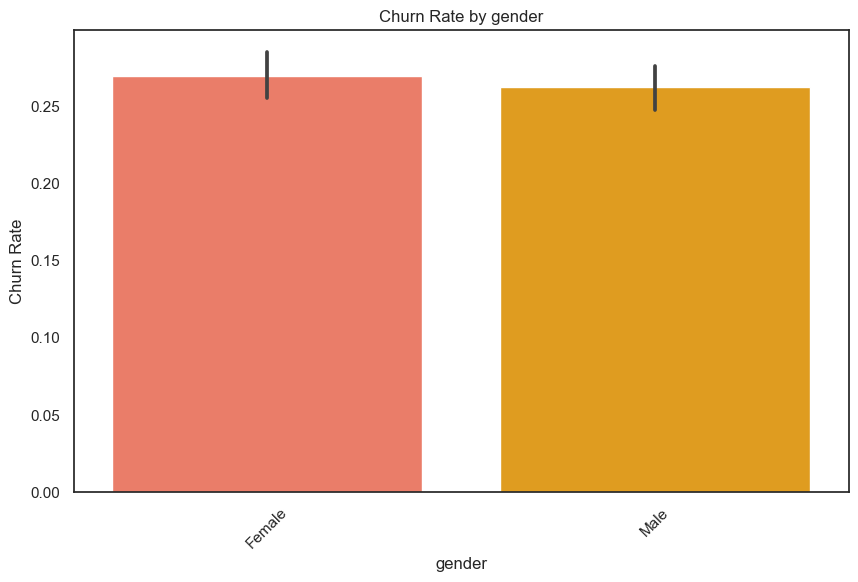

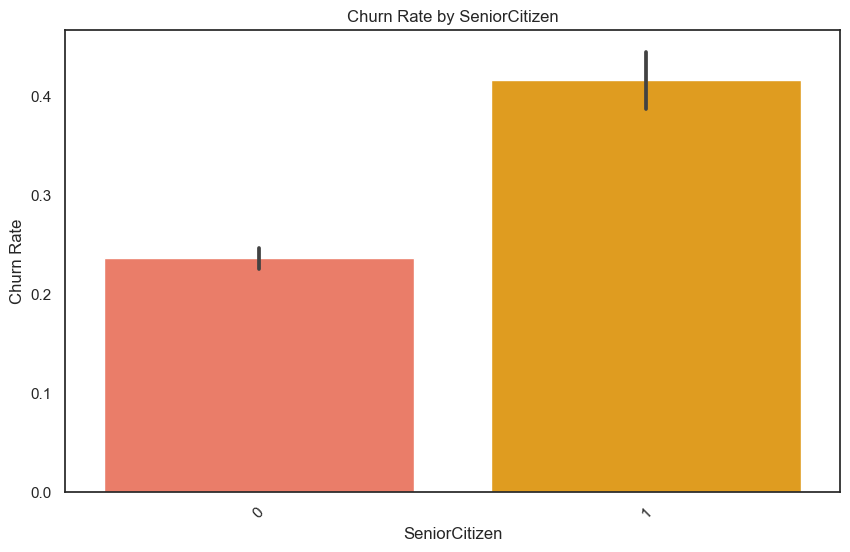

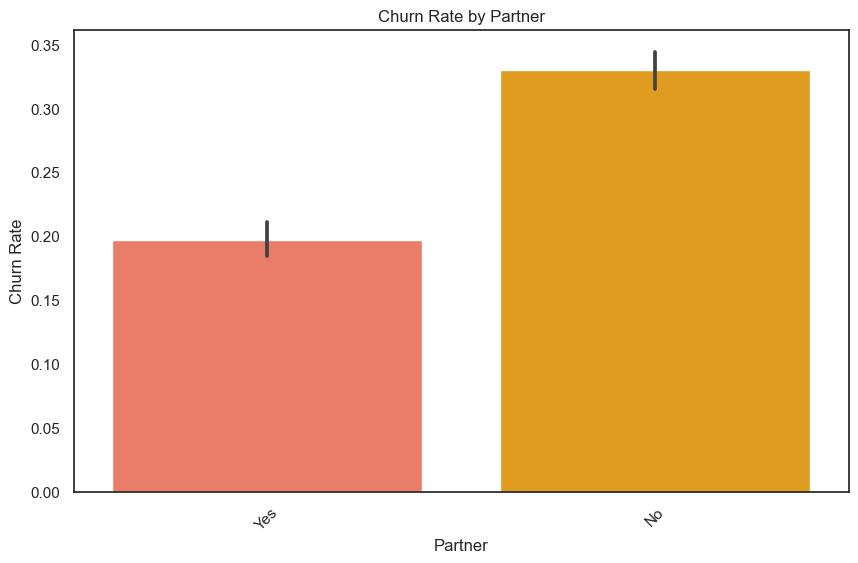

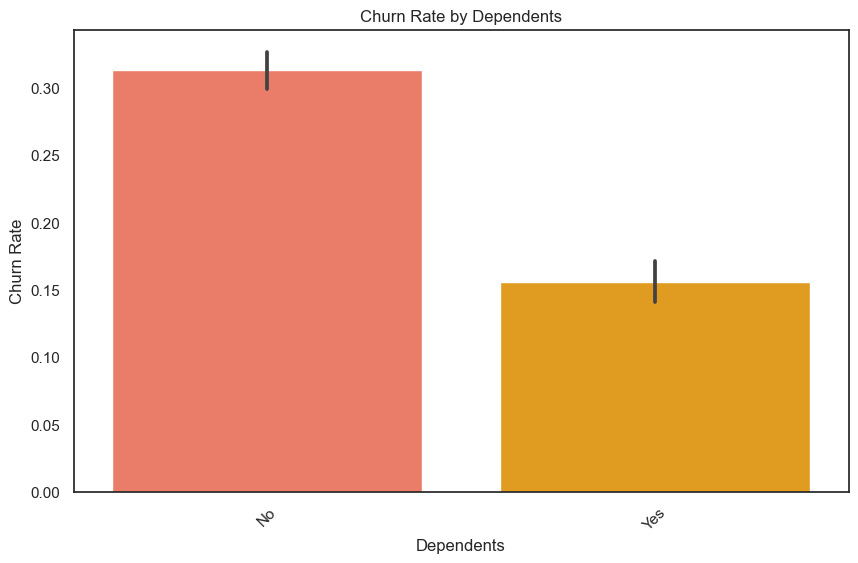

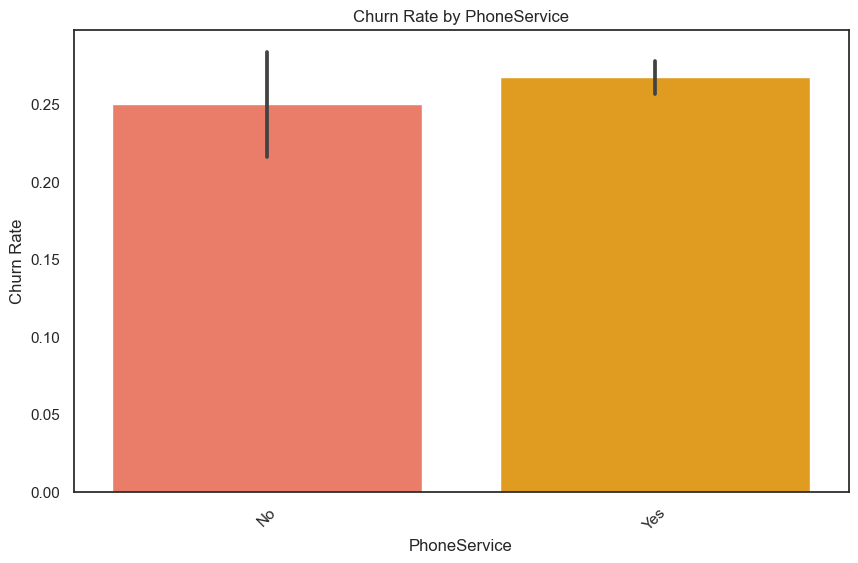

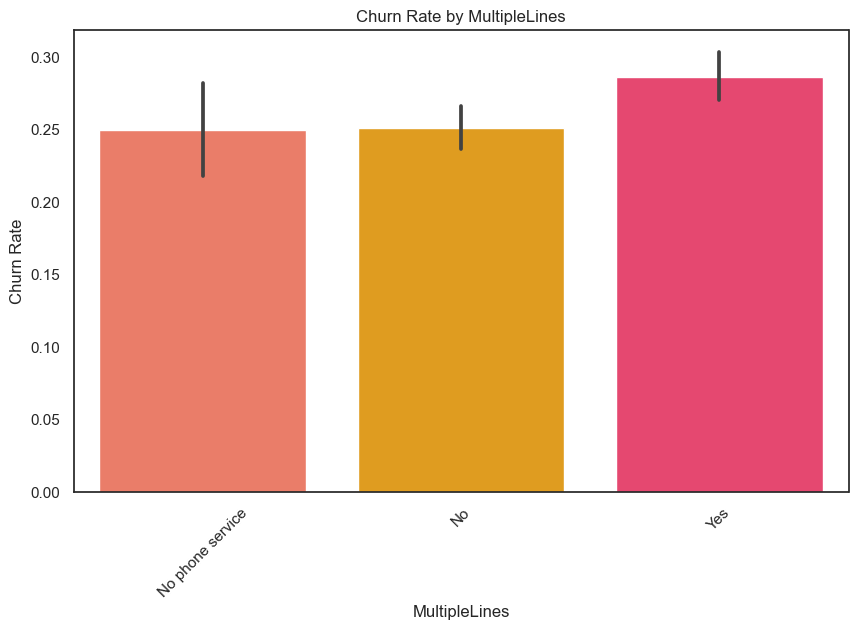

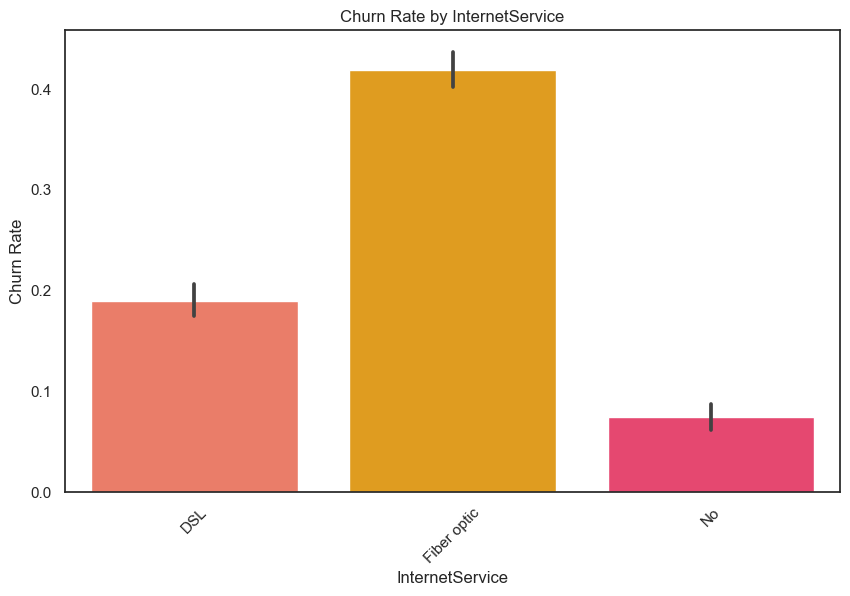

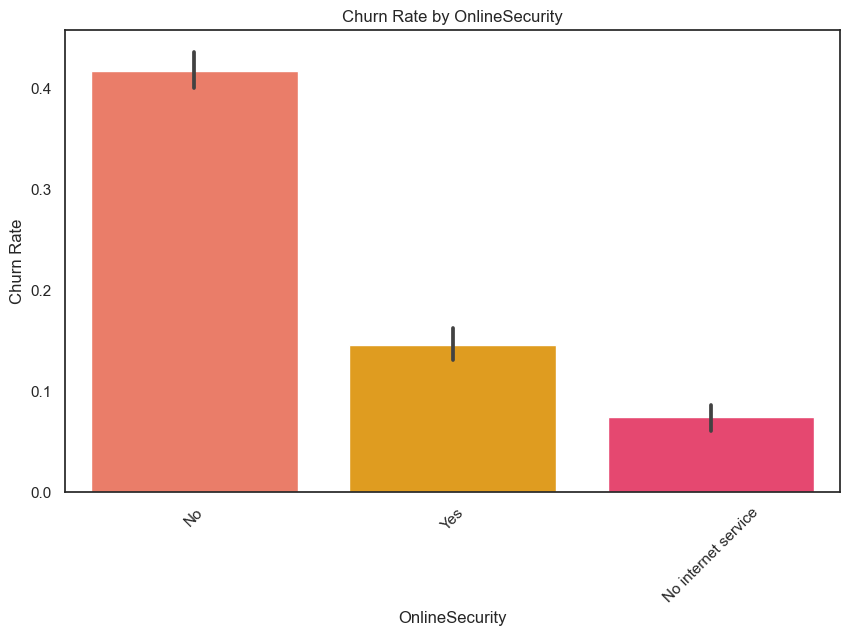

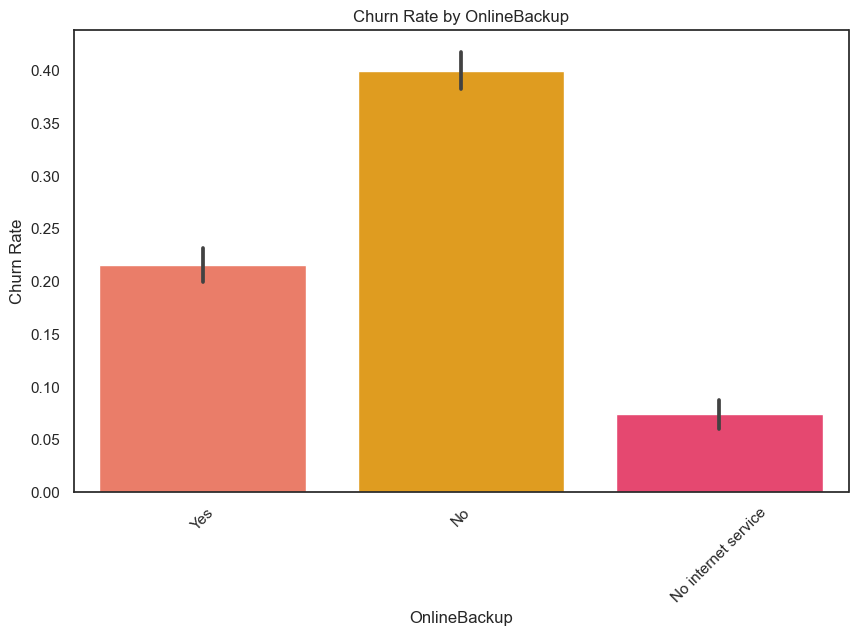

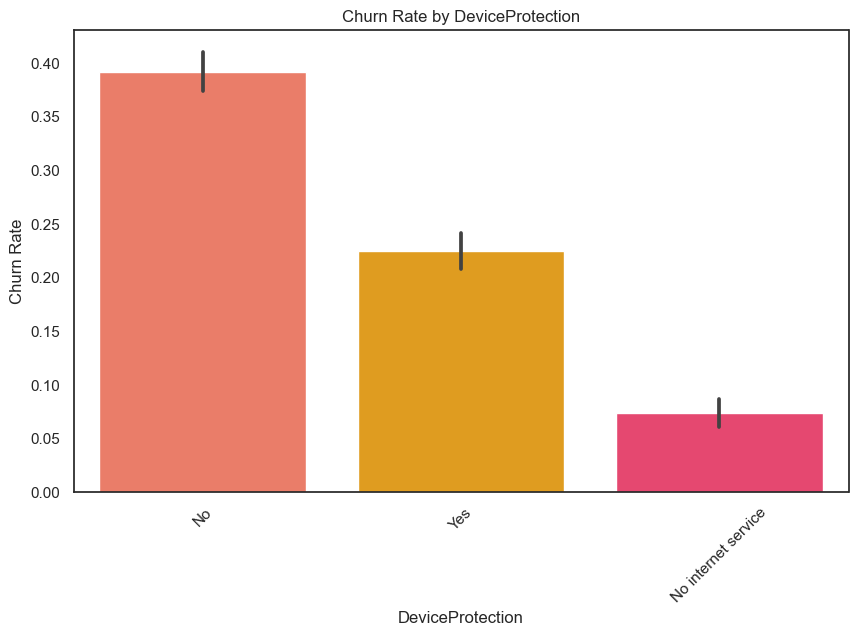

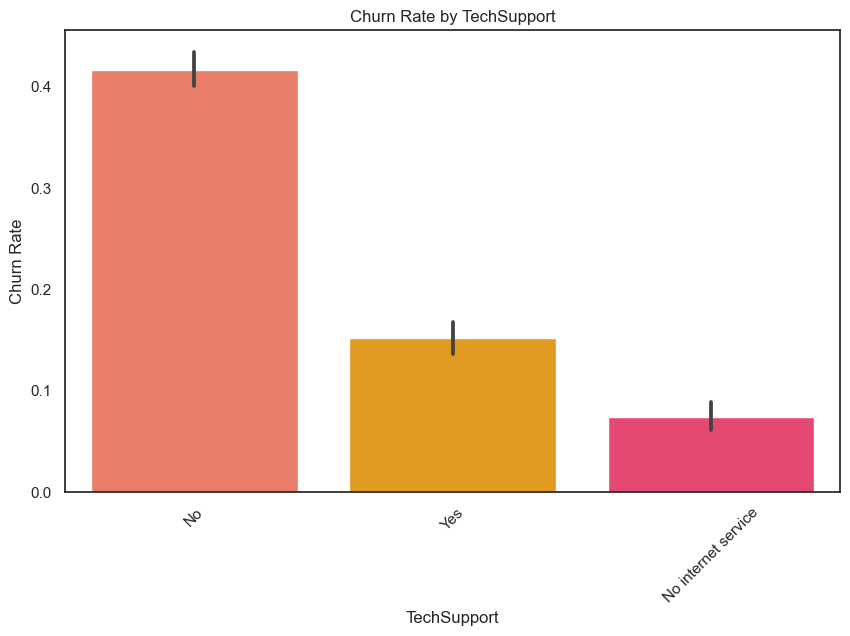

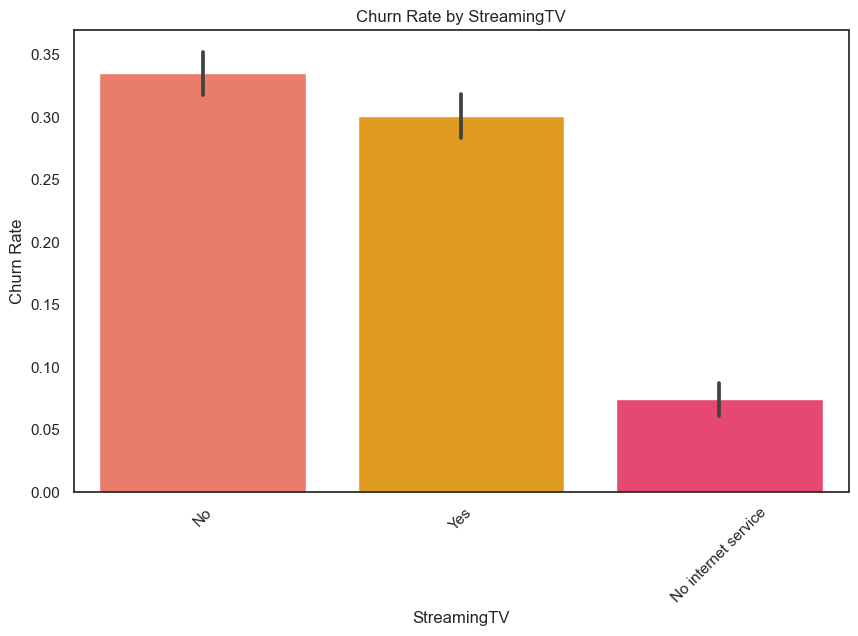

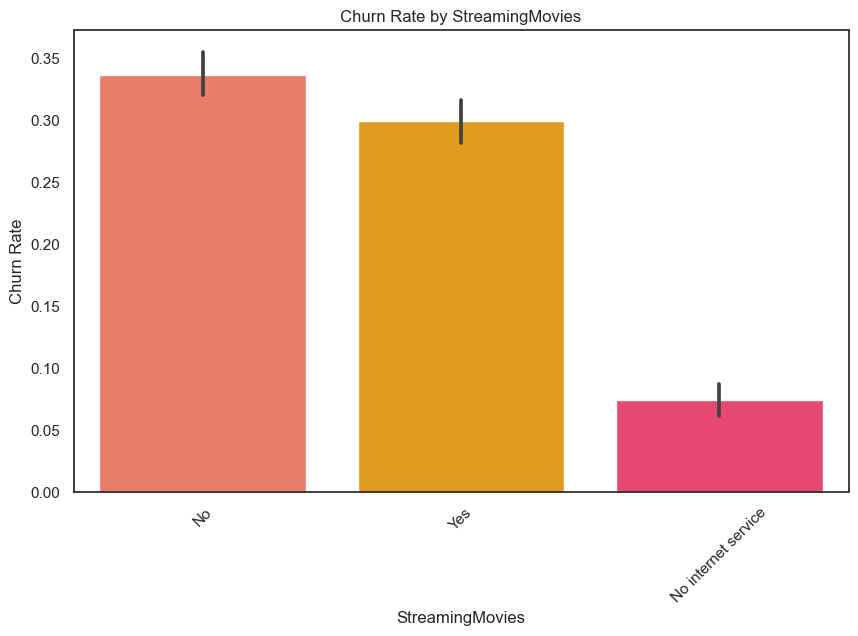

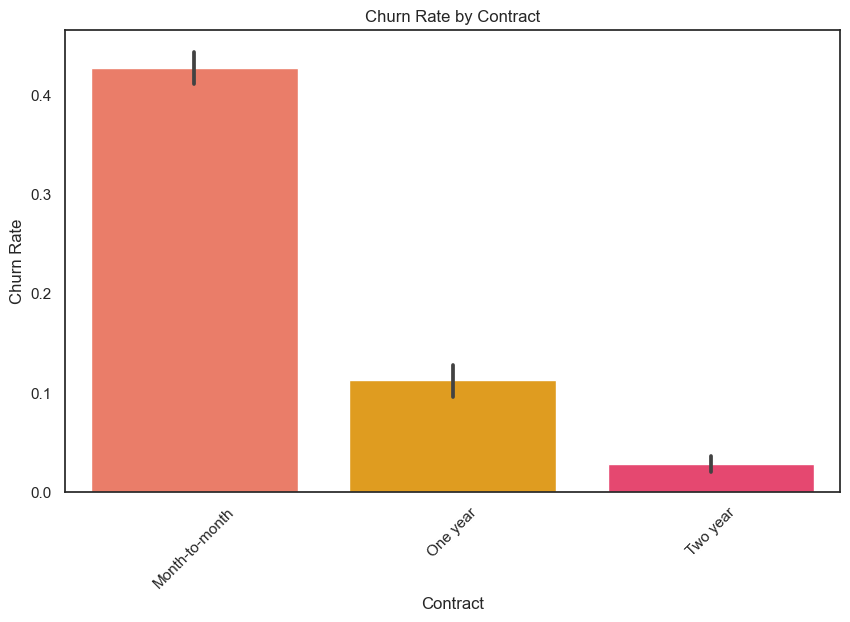

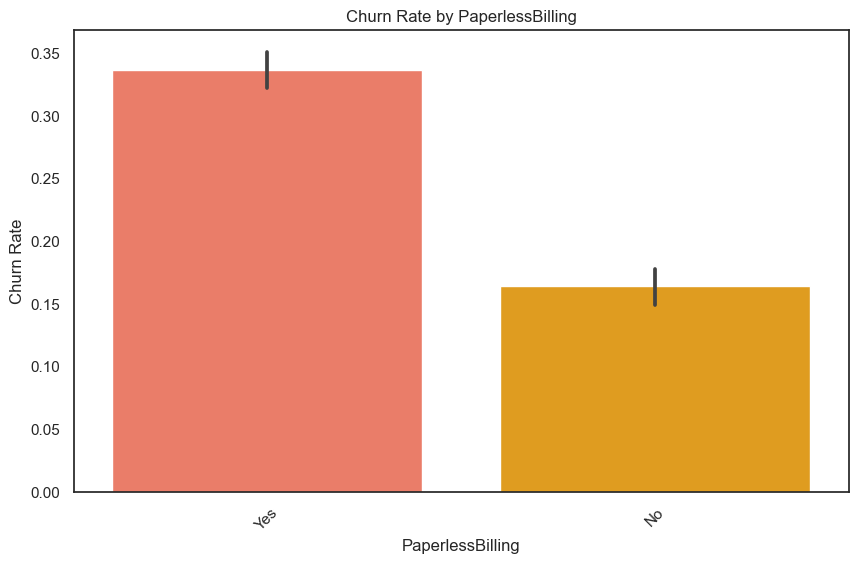

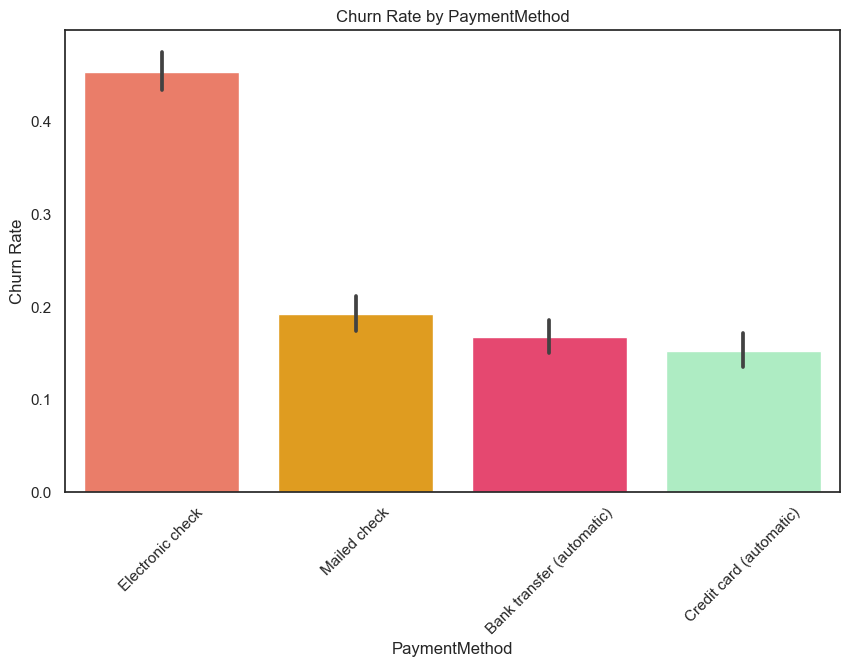

In [ ]:
# Visualizations
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='Churn', data=DATA, estimator=lambda x: sum(x) / len(x))
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

## Categorical Features Analysis:
Gender:The chi-square test result indicates that gender is not significantly associated with churn (p > 0.05).
The bar plot shows a similar churn rate for both genders.
SeniorCitizen:

SeniorCitizen is significantly associated with churn (p < 0.05), indicating that being a senior citizen has an impact on churn.
The bar plot suggests that senior citizens have a higher churn rate compared to non-senior citizens.
Partner:

Partner status is significantly associated with churn (p < 0.05), suggesting that having a partner affects churn behavior.
Customers without partners have a higher churn rate compared to those with partners.
Dependents:

Dependents status is significantly associated with churn (p < 0.05), implying that having dependents influences churn.
Customers without dependents have a higher churn rate compared to those with dependents.
PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:

These services are significantly associated with churn (p < 0.05), indicating that the presence or absence of these services affects churn behavior.
Customers without certain services (e.g., OnlineSecurity, TechSupport) have higher churn rates.
Contract:

Contract type is significantly associated with churn (p < 0.05), suggesting that the contract duration impacts churn behavior.
Month-to-month contracts have a higher churn rate compared to one-year or two-year contracts.
PaperlessBilling:

PaperlessBilling is significantly associated with churn (p < 0.05), indicating that billing method influences churn.
Customers using paperless billing have a higher churn rate.
PaymentMethod:

PaymentMethod is significantly associated with churn (p < 0.05), suggesting that the payment method affects churn behavior.
Customers using certain payment methods (e.g., Electronic check) have higher churn rates.


# CORRELATION ANALYSIS

In [ ]:
# Compute the correlation matrix for the continuous features
correlation_matrix =DATA [continuous_features].corr()

# Display the correlation matrix
print(correlation_matrix)


                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


### Use a heatmap to visualize the correlation matrix.

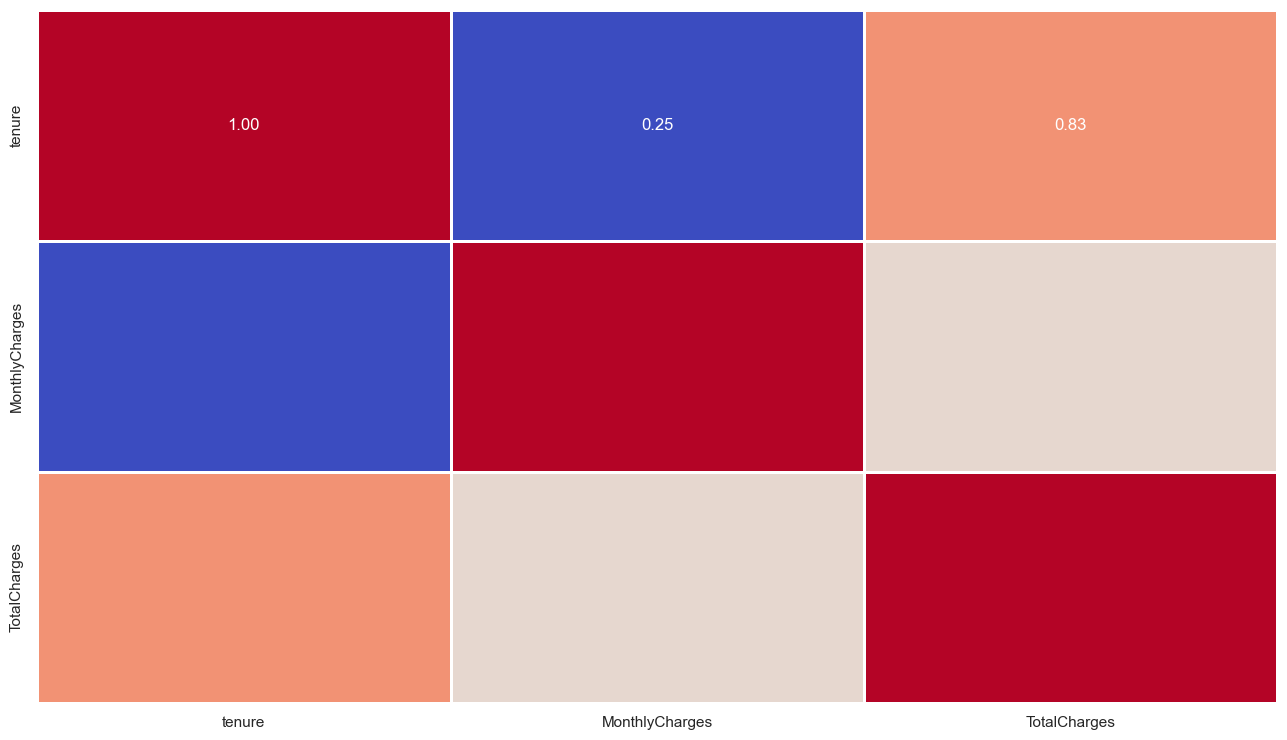

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix,cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()

### Identify any strong correlations that could be important for modeling.
Strong positive correlation: Between tenure and TotalCharges (0.83). This makes intuitive sense as customers who stay longer tend to pay more over time.

Moderate positive correlation: Between MonthlyCharges and TotalCharges (0.65). This suggests that customers who pay higher monthly charges tend to have higher total charges, which is also logical.

Weak positive correlation: Between tenure and MonthlyCharges (0.25). This indicates that there is some relationship, but it's not very strong.

## VISUALIZATION RELATIONSHIP

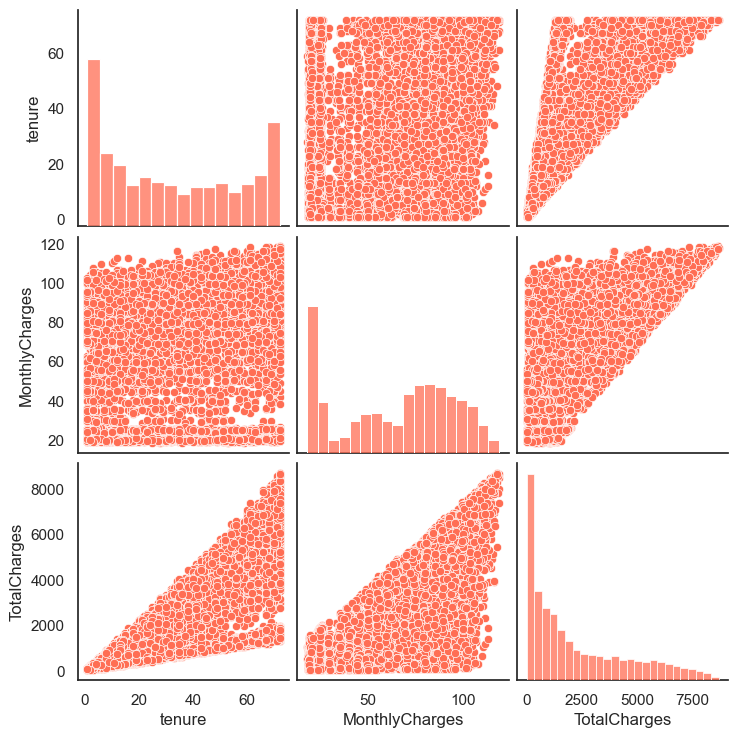

In [ ]:
#Use scatter plots or pair plots to visualize relationships between pairs of numerical features
# Create pair plots
sns.pairplot(DATA[continuous_features])
plt.show()

# Summary:
Categorical features such as SeniorCitizen, Partner, and Contract type significantly influence churn behavior.

Services subscribed, billing method, and payment method also play significant roles in determining churn.

Among numerical features, tenure has the strongest correlation with churn, indicating its importance in predicting customer churn.

## ENCODING CATEGORICAL COLUMNS

In [ ]:
import pandas as pd

# DATA is your DataFrame and cat_cols are your categorical columns
cat_cols = DATA.select_dtypes(include=['object', 'category'])

# Ensure that categorical columns have the correct categories
for col in cat_cols.columns:
    DATA[col] = DATA[col].astype('category')

# One-hot encode the categorical columns
DATA = pd.get_dummies(DATA, columns=cat_cols.columns, dtype=int)

# Now you have the one-hot encoded representation of the categorical columns


In [ ]:
DATA.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
DATA.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [ ]:
DATA.shape

(7032, 47)

In [ ]:
# Assuming 'Churn' is your target variable
correlation_with_churn = DATA.corr()['Churn']#.sort_values(by ='Churn', ascending=False)

# Display correlations
print(correlation_with_churn)


tenure                                    -0.354049
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
SeniorCitizen_0                           -0.150541
SeniorCitizen_1                            0.150541
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

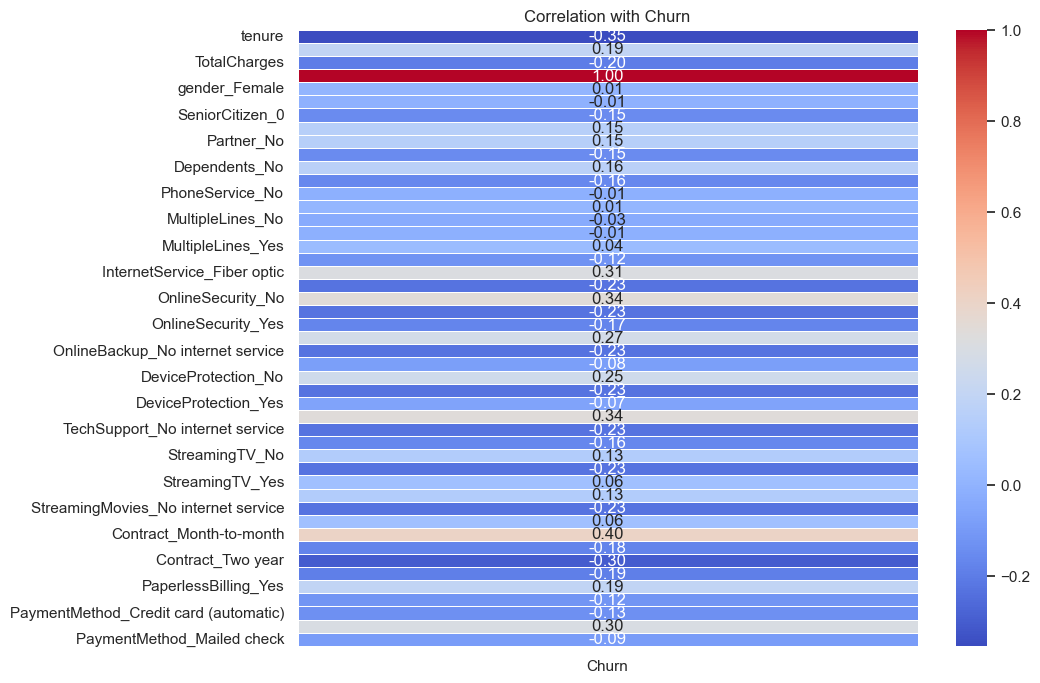

In [ ]:
# Create a heatmap for the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_churn.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with Churn')
plt.show()

## Correlation Coefficients with 'Churn' Target Variable:
Tenure: -0.354049
Negative correlation (-0.35) with churn, indicating that as tenure increases, the likelihood of churn decreases.

MonthlyCharges: 0.192858
Positive correlation (0.19) with churn, suggesting that higher monthly charges are associated with a higher likelihood of churn.

TotalCharges: -0.199484
Negative correlation (-0.20) with churn, indicating that higher total charges are associated with a lower likelihood of churn.

## Additional Categorical Features:
Gender:
Both 'gender_Female' and 'gender_Male' have very weak correlations with churn (close to 0), suggesting no significant association with churn.

Partner:
'Partner_No' has a positive correlation (0.015) with churn, while 'Partner_Yes' has a negative correlation (-0.015), indicating that having a partner is associated with a lower likelihood of churn.

Dependents:
'Dependents_No' has a positive correlation (0.019) with churn, while 'Dependents_Yes' has a negative correlation (-0.019), suggesting that having dependents is associated with a lower likelihood of churn.

InternetService:
'InternetService_Fiber optic' has a positive correlation (0.023) with churn, indicating that having fiber optic internet service is associated with a higher likelihood of churn.

## Summary:
Tenure, MonthlyCharges, and TotalCharges have notable correlations with churn, suggesting their importance in predicting churn behavior.

Among categorical features, Partner and Dependents status have noticeable correlations with churn, indicating their impact on churn behavior.

Other categorical features, such as gender, have very weak correlations with churn, suggesting they may have limited predictive power for churn prediction.

In [ ]:
#discovered null values after encoding
DATA.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [ ]:
# remove the missing values

DATA.dropna(inplace=True)

In [ ]:
DATA.shape

(7032, 47)

## MODEL TRAINING AND EVALUATION

In [ ]:
# Split the data into features (X) and target (y)
X = DATA.drop('Churn', axis=1)  # X contains all columns except 'Churn'

y = DATA['Churn'] # y contains only the 'Churn' column (target variable)

In [ ]:
# Split the dataset into training and testing sets with a test size of 30% and a random state of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2790,50,109.65,5551.15,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
898,12,98.90,1120.95,1,0,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
3965,52,106.50,5621.85,1,0,0,1,0,1,1,...,1,0,1,0,0,1,0,0,1,0
5201,9,19.90,164.60,0,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1274,62,101.15,6638.35,1,0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,16,74.55,1170.50,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5704,19,86.85,1564.40,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1366,10,85.60,813.85,0,1,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1552,31,80.55,2471.60,1,0,1,0,0,1,0,...,1,0,0,1,1,0,1,0,0,0


In [ ]:
y_train

2790    1
898     1
3965    0
5201    0
1274    0
       ..
600     0
5704    0
1366    1
1552    0
4967    1
Name: Churn, Length: 4922, dtype: int32

In [ ]:
X_test

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4253,22,88.75,1885.15,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2914,32,64.85,2010.95,0,1,1,0,1,0,1,...,1,0,1,0,0,1,1,0,0,0
1569,15,46.30,639.45,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5227,7,96.20,639.70,0,1,1,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0
4427,49,100.65,4917.75,1,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,34,88.85,3000.25,0,1,1,0,0,1,1,...,1,1,0,0,1,0,0,0,0,1
19,21,90.05,1862.90,1,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4221,1,19.30,19.30,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
5896,71,25.45,1789.65,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
y_test

4253    0
2914    0
1569    0
5227    0
4427    0
       ..
4421    0
19      0
4221    0
5896    0
1544    0
Name: Churn, Length: 2110, dtype: int32

In [ ]:
# Train the logistic regression model
model = LogisticRegression()  # Create an instance of LogisticRegression model

model

LogisticRegression()

In [ ]:
# Fit the model on the training data (X_train, y_train)
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict the target variable ('Churn') using the trained model on the test data (X_test)
y_pred = model.predict(X_test)

In [ ]:
# Import necessary functions for evaluating the model's performance
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# Print the accuracy score of the model on the test data
print(accuracy_score(y_test, y_pred))

0.8033175355450237


In [ ]:
# Print the classification report, including precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.53      0.58       530

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.80      2110



In [ ]:
# Print the confusion matrix, showing the count of true positives, true negatives, false positives, and false negatives
print(confusion_matrix(y_test, y_pred))

[[1414  166]
 [ 249  281]]


In [ ]:
# Calculate the accuracy of the logistic regression model using an alternative method (model.score)
accuracy = model.score(X_test,y_test)

print(f"Accuracy of logistic regression: {accuracy:.2f}")

Accuracy of logistic regression: 0.80


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for class 1 (Churn = 'Yes') from the model's predictions
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)


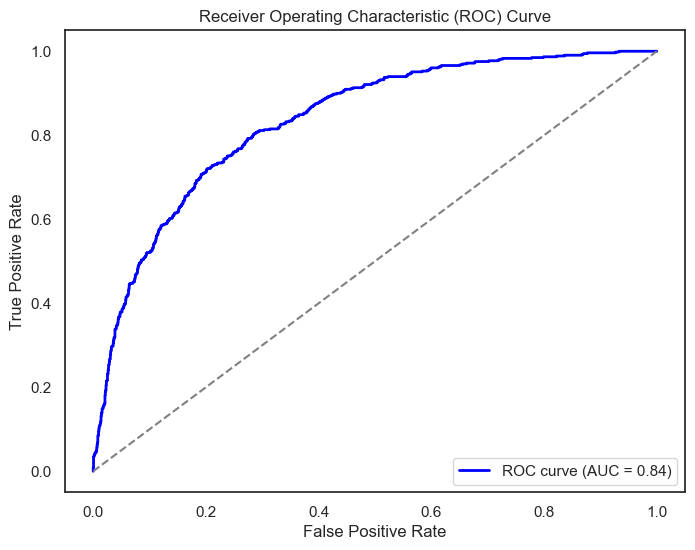

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate

In [ ]:
# Create an instance of the model you want to evaluate
model_1 = LogisticRegression()

In [ ]:
# Perform k-fold cross-validation with k=10 (default)
# This will return an array of scores for each fold

cv_result = cross_validate(model_1, X, y, cv=10)

# Show result
cv_result

{'fit_time': array([0.20969796, 0.16802955, 0.13118291, 0.14382792, 0.16667581,
        0.21988916, 0.27996492, 0.1620152 , 0.14232516, 0.18702316]),
 'score_time': array([0.00623798, 0.00588083, 0.0048449 , 0.016675  , 0.00641251,
        0.00802422, 0.00582075, 0.        , 0.0049572 , 0.00463986]),
 'test_score': array([0.80113636, 0.80823864, 0.79658606, 0.81507824, 0.78805121,
        0.79943101, 0.81507824, 0.80938834, 0.79658606, 0.80938834])}

In [ ]:
# Access fit times, score times, and test scores
fit_times = cv_result['fit_time']
score_times = cv_result['score_time']
test_scores = cv_result['test_score']

# Print fit times, score times, and test scores
print("Fit times (seconds):", fit_times)
print("Score times (seconds):", score_times)
print("Test scores:", test_scores)


Fit times (seconds): [0.20969796 0.16802955 0.13118291 0.14382792 0.16667581 0.21988916
 0.27996492 0.1620152  0.14232516 0.18702316]
Score times (seconds): [0.00623798 0.00588083 0.0048449  0.016675   0.00641251 0.00802422
 0.00582075 0.         0.0049572  0.00463986]
Test scores: [0.80113636 0.80823864 0.79658606 0.81507824 0.78805121 0.79943101
 0.81507824 0.80938834 0.79658606 0.80938834]


In [ ]:
# Print the cross-validated scores
#print("Cross-validated scores:", scores)

In [ ]:
# Extract test scores from cv_result
test_scores = cv_result['test_score']

# Calculate mean and standard deviation of test scores
mean_score = test_scores.mean()
std_score = test_scores.std()

# Print the mean and standard deviation of test scores
print("The mean cross-validation accuracy is " f"{mean_score:.3f} +/- {std_score:.3f}")

The mean cross-validation accuracy is 0.804 +/- 0.008


## ANOTHER METHOD OF CROSS VALIDATING

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Perform k-fold cross-validation with k=5 (default)
# This will return an array of scores for each fold
scores = cross_val_score(model_1, X, y, cv=5)

In [ ]:
# Print the cross-validated scores
print("Cross-validated scores:", scores)

Cross-validated scores: [0.80312722 0.81094527 0.7972973  0.80938834 0.80583215]


In [ ]:
# Calculate the mean and standard deviation of the cross-validated scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validated scores
print(f"Mean score: {mean_score:.2f}, Standard deviation: {std_score:.2f}")

Mean score: 0.81, Standard deviation: 0.00


## DECISION TREES

In [ ]:
NEW_DATA = DATA #IFYOUWANTBUILDDIFFMODELSUSINGSAME DATA BUT RENAME
NEW_DATA.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# Separate the features and the target variable
X = NEW_DATA.drop('Churn', axis=1)  # X contains all columns except 'Churn'

y = NEW_DATA['Churn'] # y contains only the 'Churn' column (target variable)

In [ ]:

# import the train_test_split
from sklearn.model_selection import train_test_split

#Split the variables
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# X_train and y_train are your training data
# X_test and y_test are your testing data


In [ ]:
from sklearn.tree import DecisionTreeClassifier# import decision tree classifer

In [ ]:
#create an instance of decisiontreeclassifier()called dtree and fit it yo the training data
classifier = DecisionTreeClassifier(max_depth = 1)

# Train the model using our training data usinf the fit() method
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

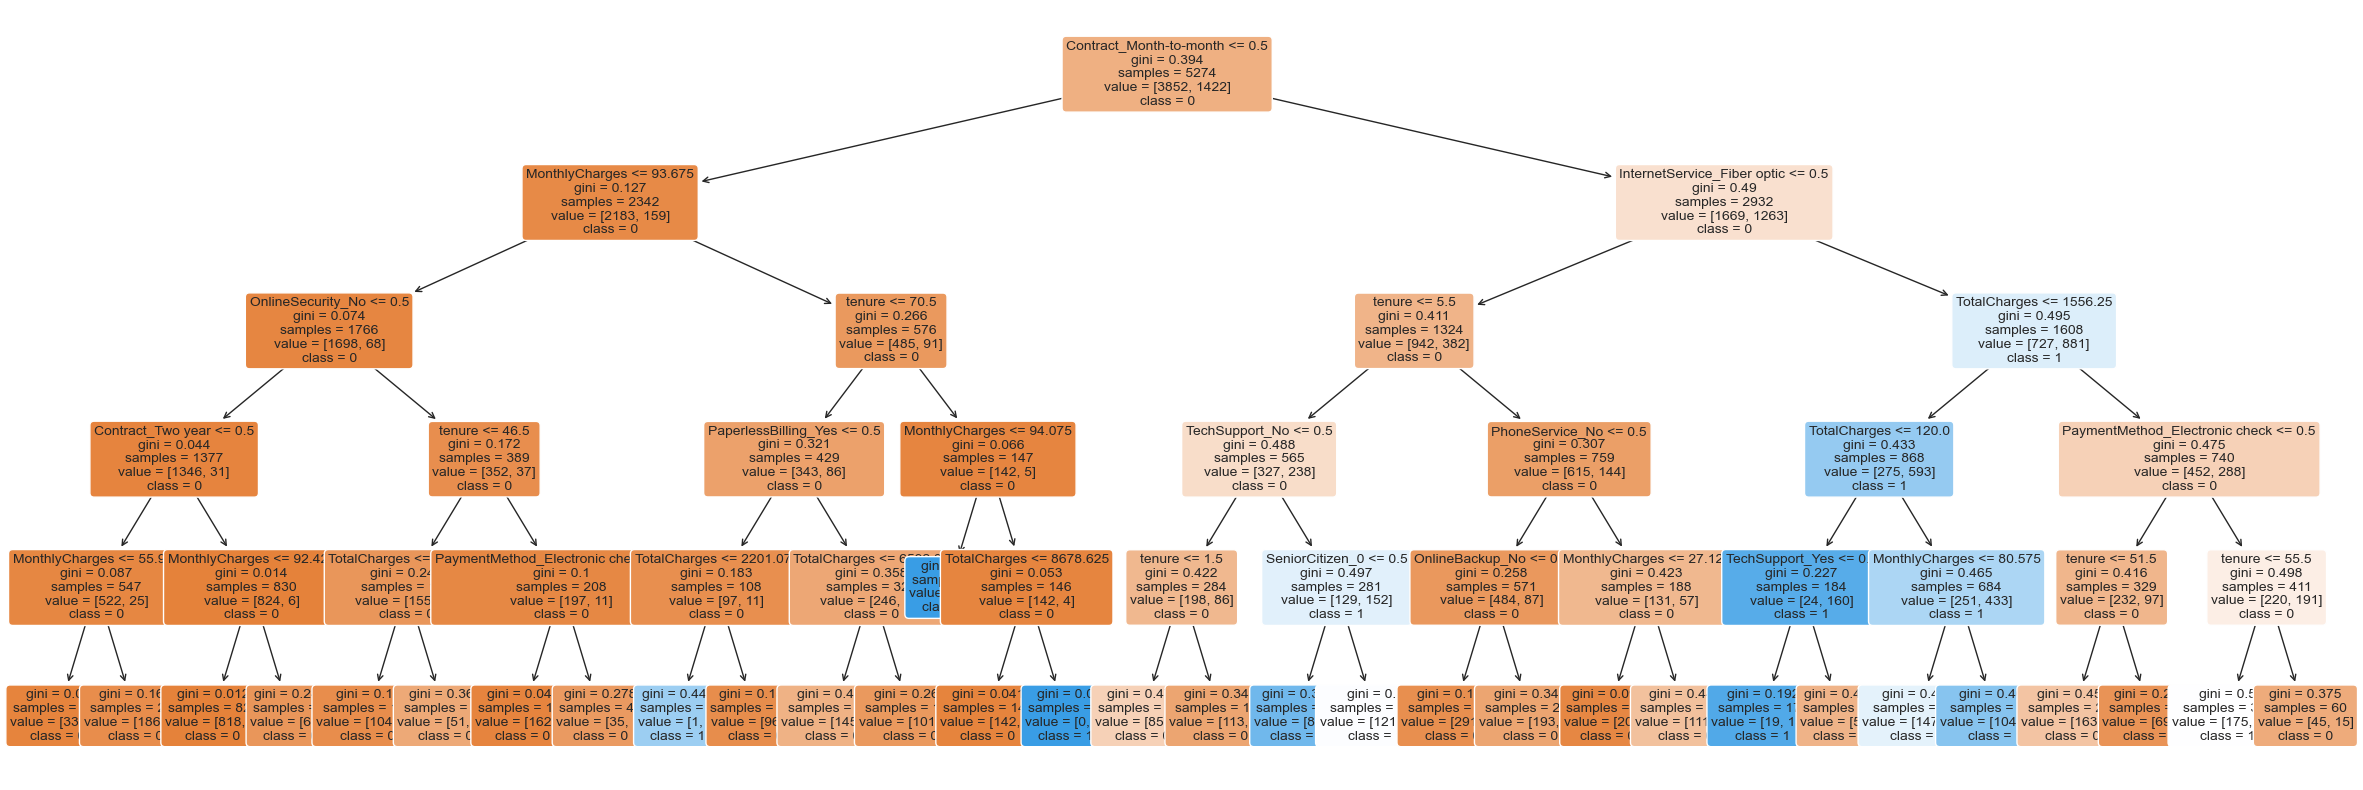

In [ ]:
# Import necessary libraries
#import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the classifier
classifier = DecisionTreeClassifier(random_state=101, max_depth = 5)
#classifier = DecisionTreeClassifier(max_depth = 10)

classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(30,10))

# Get the feature names and class names
feature_names = X.columns.tolist()  # Convert to list
class_names = classifier.classes_.astype(str).tolist()  # Ensure class names are strings

# Plot the tree
plot_tree(classifier, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.show()


In [ ]:
predictions =classifier.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=101)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1311
           1       0.60      0.63      0.61       447

    accuracy                           0.80      1758
   macro avg       0.73      0.74      0.74      1758
weighted avg       0.80      0.80      0.80      1758



In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
#print(accuracy_score(X_test, y_test))

# Evaluate the accuracy of the decision tree classifier on the test data
classifier_score = classifier.score(X_test,y_test)

# Print the accuracy score
print(classifier_score)

### Here's a brief summary of the key insights gained from the Exploratory Data Analysis (EDA):

Churn Rate: Analyzing the distribution of the target variable (Churn) revealed the proportion of customers who churned versus those who did not. This helps in understanding the imbalance in the dataset and guides further analysis and modeling efforts.

Feature Distributions: Examining the distributions of numerical features such as tenure, MonthlyCharges, and TotalCharges provided insights into their central tendencies, spread, and potential outliers. Understanding these distributions helps in identifying any patterns or trends in the data.

Correlation Analysis: Computing correlations between features and the target variable (Churn) helped identify potential relationships and predictors of churn. Features such as tenure, MonthlyCharges, and certain categorical variables may have stronger correlations with churn, indicating their importance in predicting customer churn.

Categorical Variables: Exploring the distributions of categorical variables such as gender, Contract, InternetService, etc., provided insights into the distribution of customers across different categories. This helps in understanding customer demographics and preferences, which may influence churn behavior.

Customer Segmentation: Analyzing the relationship between features and churn across different customer segments (e.g., by contract type, internet service, etc.) revealed variations in churn rates and behaviors among different customer groups. This segmentation can inform targeted marketing strategies or retention efforts.

Missing Values: Identifying and handling missing values in the dataset ensures the integrity of the analysis and modeling process. Strategies such as imputation or removal of missing values were employed to address this issue.

Overall, the EDA provided valuable insights into the dataset, highlighting potential predictors of churn, customer demographics, and patterns of behavior. These insights can guide further analysis, feature engineering, and modeling efforts aimed at developing effective churn prediction models and customer retention strategies.

## Based on both Exploratory Data Analysis (EDA) and prediction modeling, several factors have been identified as influential in predicting churn:

Contract Type: EDA revealed that customers with month-to-month contracts had higher churn rates compared to those with longer-term contracts. Prediction modeling confirmed the importance of contract type, with month-to-month contracts being a significant predictor of churn. This suggests that offering incentives or discounts for longer-term contracts could help reduce churn.

Tenure: Both EDA and prediction modeling highlighted tenure as a crucial factor influencing churn. Longer tenure was associated with lower churn rates, indicating that customer loyalty increases over time. Companies can focus on retaining long-term customers by providing personalized offers or rewards based on their tenure.

Monthly Charges: EDA showed a positive correlation between monthly charges and churn, which was confirmed by prediction modeling. Customers with higher monthly charges were more likely to churn. To mitigate this, companies can consider offering more competitive pricing plans or value-added services to justify higher charges and improve customer retention.

Internet Service Type: EDA revealed differences in churn rates based on the type of internet service subscribed by customers. Prediction modeling confirmed the importance of internet service type, particularly fiber optic service, in predicting churn. Improving the quality of service or providing incentives to retain customers using fiber optic service could help reduce churn.

Payment Method: Both EDA and prediction modeling identified payment method as a significant predictor of churn. Customers using electronic check as their payment method had higher churn rates. Companies can encourage customers to use more reliable payment methods such as bank transfer or credit card by offering incentives or streamlining payment processes.

Customer Engagement: While not directly observable in EDA, prediction modeling may uncover insights into the importance of customer engagement metrics such as usage frequency, interactions with customer support, or participation in loyalty programs. Higher levels of engagement are likely associated with lower churn rates, highlighting the importance of fostering positive customer experiences and relationships.

By integrating insights from both EDA and prediction modeling, companies can develop comprehensive churn prediction models and customer retention strategies that address the underlying factors driving churn. This iterative approach allows for a deeper understanding of customer behavior and facilitates the development of targeted interventions to reduce churn and improve customer satisfaction.